# **Tinder Analysis**

Data analysis of the dating app Tinder. Done by **Mario Lozano Cortés**, Artificial Intelligence master's student at *Universitat Rovira i Virgili* and *Universitat Politècnica de Catalunya · BarcelonaTech - UPC*. The resolution of this task is part of the Big Data Analytics course. **The goal of this project is to study and analyse the existence of differences in the behaviour of men and women in the use of the dating app Tinder**. To do so, the Big Data techniques learnt throughout the course will be used and Python and MongoDB will be employed as data manipulation and management tools. 

# **Problem description**

As previously stated, this **project's goal is to study and analyse the existence of differences in the behaviour of men and women in the use of the dating app Tinder**. As described by Wikipedia, *"Tinder is an online dating and geosocial networking application. In Tinder, users "swipe right" to like or "swipe left" to dislike other users' profiles, which include their photos, a short bio, and a list of their interests. Tinder uses a "double opt-in" system where both users must like each other before they can exchange messages"*. 

The application makes use of a **freemium model**. Thus, the basic functionalities are free to use, while the advanced functionalities require a fee to be used. Some of the premium features are unlimited likes (100 in the basic version), super likes with messages, discovering who has liked your profile or highlighting your likes to other users. In this way, **the app must know how its users use each of the features in order to achieve the best possible business model**. Immediately, **we can distinguish two groups in the application, men and women** (as organised by the application itself). Thus, one of the first questions that arise is whether there are differences in the use of the application between the two groups.  **This question is especially relevant for a correct segmentation of the market to offer an appropriate set of features to both men and women.**

In order to carry out the proposed analysis, **the following questions are defined** to be resolved throughout the analysis: 

**Questions:**
    
- *Who is more selective? Passes vs Likes by sex* 

- *Who recieves the more attention? Matches by sex*

- *Who uses the app the most? App opens by sex*

- *Who is most willing to pay for a subscription? Number of times the likes limit is reached per sex*

- *Who talks the most? Messaging behaviour by sex*

- *What is the minimum, mean and maximum percentage of one message-conversations for every sex? What about the number of ghostings after the initial message?*

- *Who uses more instagram by sex?*

- *More used emojis by sex*

# **Data collection**

**[swipestats.io](https://www.swipestats.io/) provided the data at no cost for academic purposes**. swipestats.io is an anonymous data visualization and comparison web service that seeks to help people understand their Tinder data. For using the service a person must download its data from the Tinder app and upload it to swipestats to get interesting insights about their behaviour in the app.

**The dataset consists of a single JSON file (560MB) and none a single description or explanation of the data is given. Thus, the most crucial task of the analysis is to understand the data at hand** to be able to get valuable information from it.

# **Mongo DB data load**

**Relational DBs** are based on the relational model, which organizes data into tables with rows and columns with minimal data repetition. Each row represents a record, and each column represents a field in the record. Nevertheless, the relationships between the tables as well as the column data types need to be defined prior to the use of the database. Some examples of relational databases include MySQL, Oracle, and Microsoft SQL Server.

**NoSQL databases**, on the other hand, are non-relational databases that are designed to handle large amounts of data that is structured, semi-structured, or unstructured. NoSQL databases are often used for storing large volumes of data that do not fit well into the tabular structure of a traditional relational database. Some examples of NoSQL databases include MongoDB and Apache CouchDB.

Thus, we can state several key differences between relational and NoSQL databases:

- **Data structure**: Relational databases use a tabular structure to store data, while NoSQL databases can use a variety of data structures, such as key-value pairs, documents, and graphs.

- **Query language**: Relational databases use SQL to manipulate and query data, while NoSQL databases may use a variety of query languages, such as MongoDB Query Language.

- **Flexibility**: NoSQL databases are generally more flexible than relational databases, as they can store data in a variety of formats and structures. This makes them well-suited for handling semi-structured and unstructured data.


In summary, **relational databases are good for structured data and support complex queries, while NoSQL databases are better for large volumes of unstructured data. Because of all these reasons, the choice for the task at hand is NoSQL and MongoDB since the data is semi-structured and given in a JSON, not following a tabular structure.**

In [1]:
# Imports
import emoji # To work with emojis
import numpy as np # Calculus
import plotly.express as px # Plots
from collections import Counter # Counting hashable objects

import json # Load and work with JSONs
import pymongo # Mongo DB on Python
from pymongo import MongoClient # MongoDB

In [2]:
# Create client
client = MongoClient('localhost', 27017, username='mongoadmin', password='pass1234')

# Get the list of DBs already defined
print(client.list_database_names())

# Create a new DB - bda
database = client['bda']

# Create a collection
tinder = database.tinder

# Load the data
with open('tinder_dataset/profiles_2021-11-10.json', 'r') as f:
    data = json.load(f)

['admin', 'bda', 'config', 'local']


In [3]:
# Load the data
result = tinder.insert_many(data)
tinder.count_documents({})

1209

In [4]:
# Check if data was loaded correctly. Only one key is displayed because of the extremely long output
tinder.find_one()[list(tinder.find_one().keys())[-2]]

{'birthDate': '1976-01-01T00:00:00.000Z',
 'ageFilterMin': 21,
 'ageFilterMax': 35,
 'cityName': 'Trondheim',
 'country': 'Norway',
 'createDate': '2016-01-01T09:30:07.551Z',
 'education': 'Has high school and/or college education',
 'gender': 'M',
 'interestedIn': 'F',
 'genderFilter': 'F',
 'instagram': False,
 'spotify': False,
 'jobs': [],
 'educationLevel': 'Has high school and/or college education',
 'schools': []}

# **Data description**

Get to know the data. The following section seeks to **describe the data. It should be taken into account that not a single description or explanation was given. Hence, an analysis should be driven in order to perfectly understand the data at hand, allowing the posterior analysis of the data and the extraction of valuable information**. Thus, the data is analysed field by field and each one gets described thanks to the experiments carried out and the actual use of the application to discover the concrete meaning of each one.

In [5]:
# Get list of keys
tinder.find_one().keys()

dict_keys(['_id', '__v', 'appOpens', 'conversations', 'conversationsMeta', 'matches', 'messages', 'messagesReceived', 'messagesSent', 'swipeLikes', 'swipePasses', 'swipes', 'user', 'userId'])

**Explore all keys one by one**

In [6]:
# Get an idea of how id's are
cursor = tinder.find_one({}, {'_id': 1})
print(cursor)

# Get all possible values of id's
cursor = tinder.distinct('_id')
print(f"Number of different id's: {len(cursor)}")

{'_id': '00b74e27ad1cbb2ded8e907fcc49eaaf'}
Number of different id's: 1209


**From what can be extracted, '_id' is a unique and anonymous identifier for each instance of the dataset.** Moreover, __v is a versionKey that contains information about the internal revision of the document so it's not remarkable for the current analysis.

In [7]:
# Get an idea of how appOpens is. Only some entries are displayed because of the extremely long output
cursor = tinder.find_one({}, {'appOpens': 1})
dict(list(cursor['appOpens'].items())[0:10])

{'2016-01-02': 26,
 '2016-01-13': 10,
 '2016-01-15': 28,
 '2016-01-17': 18,
 '2016-01-19': 15,
 '2016-01-20': 2,
 '2016-01-22': 16,
 '2016-01-30': 17,
 '2016-01-31': 17,
 '2016-02-01': 7}

From what can be extracted, **'appOpens' refers to the number of times a user opens the app by date**. The information is stored in a dictionary where the key is the date.

In [8]:
# Get an idea of how conversations are
cursor = tinder.find_one({}, {'conversations': 1})
cursor['conversations'][0:2]

[{'match_id': 'Match 739',
  'messages': [{'to': 738,
    'from': 'You',
    'sent_date': 'Sun, 04 Aug 2019 12:50:22 GMT'},
   {'to': 738, 'from': 'You', 'sent_date': 'Fri, 09 Aug 2019 19:39:31 GMT'},
   {'to': 738, 'from': 'You', 'sent_date': 'Sun, 11 Aug 2019 12:14:55 GMT'}]},
 {'match_id': 'Match 738',
  'messages': [{'to': 737,
    'from': 'You',
    'sent_date': 'Sat, 03 Aug 2019 23:35:18 GMT'},
   {'to': 737, 'from': 'You', 'sent_date': 'Sun, 04 Aug 2019 12:01:16 GMT'},
   {'to': 737, 'from': 'You', 'sent_date': 'Sun, 04 Aug 2019 14:47:34 GMT'},
   {'to': 737, 'from': 'You', 'sent_date': 'Sun, 04 Aug 2019 15:53:06 GMT'},
   {'to': 737, 'from': 'You', 'sent_date': 'Sun, 04 Aug 2019 21:02:01 GMT'},
   {'to': 737, 'from': 'You', 'sent_date': 'Mon, 05 Aug 2019 06:15:28 GMT'},
   {'to': 737, 'from': 'You', 'sent_date': 'Mon, 05 Aug 2019 06:42:17 GMT'},
   {'to': 737, 'from': 'You', 'sent_date': 'Mon, 05 Aug 2019 06:42:53 GMT'},
   {'to': 737, 'from': 'You', 'sent_date': 'Mon, 05 Aug 2

In [9]:
# Get all possible values for the sender of the messages
cursor = tinder.distinct('conversations.messages.from')
cursor

['You']

From what can be extracted,  **'conversations' refers to messages sent by the user considered. The information is stored in a list of dictionaries where every dictionary stores a conversation with a match.**

In [10]:
# Get an idea of how conversationsMeta is
cursor = tinder.find_one({}, {'conversationsMeta': 1})
cursor['conversationsMeta']

{'nrOfConversations': 739,
 'longestConversation': 133,
 'longestConversationInDays': 683.5574421296296,
 'averageConversationLength': 8.56021650879567,
 'averageConversationLengthInDays': 10.236619931839824,
 'medianConversationLength': 3,
 'medianConversationLengthInDays': 0.08113425925925925,
 'nrOfOneMessageConversations': 226,
 'percentOfOneMessageConversations': 30.581867388362653,
 'nrOfGhostingsAfterInitialMessage': 66}

**Since some of the field's interpretations are not clear and no instructions or explanations were given with the data, the first mission of a data scientist is to get to understand the data at hand. Hence, let's check if the guessed meaning for each field is correct or not by computing the information through the conversations themself.**  

In [11]:
# Get conversations from a sample and get its statictics
cursor = tinder.find_one({}, {'conversations': 1})

# Number of conversations
nrOfConversations = len(cursor['conversations'])

# Longest conversation
lens = []
for i in range(len(cursor['conversations'])):
     lens.append(len(cursor['conversations'][i]['messages']))
longestConversation = max(lens)

# Longest conversation in days
import datetime
differences = []
for match in cursor['conversations']:
    try:
        d1 = datetime.datetime.strptime(match['messages'][0]['sent_date'], '%a, %d %b %Y %H:%M:%S GMT')
        d2 = datetime.datetime.strptime(match['messages'][-1]['sent_date'], '%a, %d %b %Y %H:%M:%S GMT')
        diff = (d2 - d1).total_seconds() / 60 / 60 / 24
        differences.append(diff)
    except:
        pass
longestConversationInDays = max(differences)

# Number of ghostings after initial message
nrOfGhostingsAfterInitialMessage = 0
for i in range(len(cursor['conversations'])):
    if len(cursor['conversations'][i]['messages']) == 0:
        nrOfGhostingsAfterInitialMessage+=1
        
print(f"nrOfConversations: {str(nrOfConversations)}\nlongestConversation: {str(longestConversation)}\nlongestConversationInDays: {str(longestConversationInDays)}\nnrOfGhostingsAfterInitialMessage: {str(nrOfGhostingsAfterInitialMessage)}")

nrOfConversations: 739
longestConversation: 133
longestConversationInDays: 683.5574421296296
nrOfGhostingsAfterInitialMessage: 66


From what can be extracted, **'conversationsMeta' refers to the metadata of the messages sent by the user considered. The information is stored in a dictionary where the following data is found:**

- **nrOfConversations**: Total number of conversations held
- **longestConversation**: Length of the longest conversation
- **longestConversationInDays**: Length of the longest conversation considering the days passed since the first and last messages.
- **averageConversationLength**: Average length of the conversations held
- **averageConversationLengthInDays**: Average length of the conversations considering the days passed since the first and last messages.
- **medianConversationLength**:  Median length of the conversations held
- **medianConversationLengthInDays**: Median length of the conversation considering the days passed since the first and last messages.
- **nrOfOneMessageConversations**: Total number of conversations consisting of just one message
- **percentOfOneMessageConversations**: Percentage of one message conversations as *nrOfOneMessageConversations/nrOfConversations*.
- **nrOfGhostingsAfterInitialMessage**: Total number of times where a first message received (a match is starting the conversation) is not replied to by the user.

In [12]:
# Get an idea of how matches is
cursor = tinder.find_one({}, {'matches': 1})
dict(list(cursor['matches'].items())[0:10])

{'2016-01-02': 10,
 '2016-01-13': 5,
 '2016-01-15': 9,
 '2016-01-17': 8,
 '2016-01-19': 6,
 '2016-01-20': 13,
 '2016-01-22': 4,
 '2016-01-30': 14,
 '2016-01-31': 2,
 '2016-02-01': 12}

From what can be extracted, **'matches' refers to the number of total matches a user gets by date**. The information is stored in a dictionary where the key is the date.

In [13]:
# Get an idea of how messages are
cursor = tinder.find_one({}, {'messages': 1})

In [14]:
dict(list(cursor['messages']['sent'].items())[0:10])

{'2016-01-02': 11,
 '2016-01-13': 2,
 '2016-01-15': 1,
 '2016-01-17': 5,
 '2016-01-19': 8,
 '2016-01-20': 10,
 '2016-01-22': 2,
 '2016-01-30': 12,
 '2016-01-31': 6,
 '2016-02-01': 5}

In [15]:
dict(list(cursor['messages']['received'].items())[0:10])

{'2016-01-02': 12,
 '2016-01-13': 3,
 '2016-01-15': 13,
 '2016-01-17': 0,
 '2016-01-19': 11,
 '2016-01-20': 6,
 '2016-01-22': 7,
 '2016-01-30': 2,
 '2016-01-31': 0,
 '2016-02-01': 7}

From what can be extracted, **'messages' refers to the number of total messages a user sends or receives by date**. The information is stored in a dictionary where the keys are 'sent' and 'received'. In a similar way, each key refers to a dictionary where the key is the date and the value of the number of messages.

In [16]:
# Get an idea of how messagesReceived and messagesSent are
cursor = tinder.find_one({}, {'messagesReceived': 1, 'messagesSent': 1, 'messages': 1, })

# Check if messagesReceived and messsages contain the same information
equal_received = True
for key in cursor['messagesReceived'].keys():
    if cursor['messages']['received'][key] != cursor['messagesReceived'][key]:
        equal_received = False

# Check if messagesSent and messsages contain the same information
equal_sent = True
for key in cursor['messagesSent'].keys():
    if cursor['messages']['sent'][key] != cursor['messagesSent'][key]:
        equal_sent = False      
        
print(f"messages and messagesReceived contained the same information: {equal_received}")
print(f"messages and messagesSent contained the same information: {equal_sent}")

messages and messagesReceived contained the same information: True
messages and messagesSent contained the same information: True


**As can be seen,  'messagesReceived', 'messagesSent' and 'messages' contain the same information and thus,  'messagesReceived', 'messagesSent'  can be deleted since it is redundant information.**

In [17]:
# Get an idea of how swipePasses are
cursor = tinder.find_one({}, {'swipes': 1})

In [18]:
dict(list(cursor['swipes']['likes'].items())[0:10])

{'2016-01-02': 50,
 '2016-01-13': 70,
 '2016-01-15': 21,
 '2016-01-17': 5,
 '2016-01-19': 29,
 '2016-01-20': 92,
 '2016-01-22': 27,
 '2016-01-30': 77,
 '2016-01-31': 84,
 '2016-02-01': 76}

In [19]:
dict(list(cursor['swipes']['passes'].items())[0:10])

{'2016-01-02': 14,
 '2016-01-13': 93,
 '2016-01-15': 75,
 '2016-01-17': 96,
 '2016-01-19': 71,
 '2016-01-20': 38,
 '2016-01-22': 76,
 '2016-01-30': 56,
 '2016-01-31': 21,
 '2016-02-01': 49}

From what can be extracted, **'swipes' refers to the number of total swipes a user performs. The information is stored in a dictionary where the keys are 'likes' and 'passes', each one referring to the swipes for people the user likes and for people the user doesn't like respectively.** Similarly, each key refers to a dictionary where the key is the date and the value of the number of swipes.

In [20]:
# Get an idea of how swipeLikes are and swipePasses are
cursor = tinder.find_one({}, {'swipeLikes': 1, 'swipePasses': 1, 'swipes': 1, })

# Check if swipeLikes and swipes contain the same information
equal_likes = True
for key in cursor['swipeLikes'].keys():
    if cursor['swipes']['likes'][key] != cursor['swipeLikes'][key]:
        equal_received = False

# Check if swipePasses and swipes contain the same information
equal_passes = True
for key in cursor['swipePasses'].keys():
    if cursor['swipes']['passes'][key] != cursor['swipePasses'][key]:
        equal_sent = False      
        
print(f"swipeLikes and swipes contained the same information: {equal_likes}")
print(f"swipePasses and swipes contained the same information: {equal_passes}")

swipeLikes and swipes contained the same information: True
swipePasses and swipes contained the same information: True


**As can be seen,  'swipeLikes', 'swipePasses' and 'swipes' contain the same information and thus,  'swipeLikes', 'swipePasses'  can be deleted since it is redundant information.**

In [21]:
# Get an idea of how user is
cursor = tinder.find_one({'user.jobs': {'$ne': []}}, {'user': 1})
cursor['user']

{'birthDate': '1996-11-10T00:00:00.000Z',
 'ageFilterMin': 18,
 'ageFilterMax': 27,
 'createDate': '2017-11-17T23:30:37.231Z',
 'education': 'Has no high school or college education',
 'gender': 'M',
 'interestedIn': 'F',
 'genderFilter': 'F',
 'instagram': True,
 'spotify': False,
 'jobs': [{'companyDisplayed': False,
   'titleDisplayed': True,
   'title': 'Research Assistant'}],
 'educationLevel': 'Has no high school or college education',
 'schools': [{'displayed': True, 'name': 'Humboldt-Universität zu Berlin'}]}

In [22]:
# Get different values for education
print(tinder.distinct('user.education'))

# Get different values for education level
print(f"{tinder.distinct('user.educationLevel')}\n")

# Check if user.education and user.educationLevel contain the same information
equal_education = True
cursor = tinder.find({}, {'user': 1})
for user in cursor:
    if user['user']['education'] != user['user']['educationLevel']:
        equal_education = False
print(f"user.education and user.educationLevel contained the same information: {equal_education}")

['Has high school and/or college education', 'Has no high school or college education']
['Has high school and/or college education', 'Has no high school or college education']

user.education and user.educationLevel contained the same information: True


**As can be seen, 'user.education' and 'user.educationLevel'contain the same information and thus, 'user.educationLevel' can be deleted since it is redundant information.**

In [23]:
# Get different values for gender
tinder.distinct('user.gender')

['', 'F', 'M']

In [24]:
# Get different values for gender filter
tinder.distinct('user.genderFilter')

['', 'F', 'M', 'M and F']

From what can be extracted,  **'user' refers to the personal data of the user considered. The information is stored in a dictionary** where the following data is found:

- **birthDate**
- **ageFilterMin**: Minimum age parameter for profiles displayed to the user.
- **ageFilterMax**: Maximum age parameter for profiles displayed to the user.
- **createDate**: Profile creation date
- **education**: Whether the profile has or has not high school or college education.
- **gender**: M and F as possible values
- **interestedIn**: Gender the profile is interested in. M, F or M and F.
- **genderFilter**: Gender parameter for profiles displayed to the user.
- **instagram**: Whether the profile links to an Instagram profile or not
- **spotify**: Whether the profile links to a Spotify profile or not
- **jobs**: Dictionary with job information containing: companyDisplayed (whether the company is displayed or not), titleDisplayed (whether the job title is displayed or not) and title.
- **educationLevel**: Whether the profile has or has not high school or college education.
- **schools**: Dictionary with school information containing: displayed (whether the school name is displayed or not), and name.

In [25]:
# Check if '_id' is equal to 'userId'
tinder.distinct('_id') == tinder.distinct('userId')

True

**'_id' and 'userId' store the same information. Thus, 'userId' can be deleted since it is redundant information.**

In [26]:
# Get subkeys for interesting fields
cursor = tinder.find_one()

keys = []
for key in cursor.keys():
    
    if type(cursor[key]) == dict and key in ['conversationsMeta', 'swipes', 'user']:
        for nested_key in cursor[key].keys():
            keys.append(key + '.' + nested_key)
    else:
        keys.append(key)
        
print(keys)

['_id', '__v', 'appOpens', 'conversations', 'conversationsMeta.nrOfConversations', 'conversationsMeta.longestConversation', 'conversationsMeta.longestConversationInDays', 'conversationsMeta.averageConversationLength', 'conversationsMeta.averageConversationLengthInDays', 'conversationsMeta.medianConversationLength', 'conversationsMeta.medianConversationLengthInDays', 'conversationsMeta.nrOfOneMessageConversations', 'conversationsMeta.percentOfOneMessageConversations', 'conversationsMeta.nrOfGhostingsAfterInitialMessage', 'matches', 'messages', 'messagesReceived', 'messagesSent', 'swipeLikes', 'swipePasses', 'swipes.likes', 'swipes.passes', 'user.birthDate', 'user.ageFilterMin', 'user.ageFilterMax', 'user.cityName', 'user.country', 'user.createDate', 'user.education', 'user.gender', 'user.interestedIn', 'user.genderFilter', 'user.instagram', 'user.spotify', 'user.jobs', 'user.educationLevel', 'user.schools', 'userId']


# **Data cleaning**

This section **removes the redundant information discovered during the data description** process so as to improve performance of the future queries.

In [27]:
# Remove redundant information
tinder.update_many({},{'$unset': {'messagesReceived': "", 
                                  'messagesSent': "", 
                                  'swipeLikes': "",
                                  'swipePasses': "",
                                  'user.educationLevel': "", 
                                  'userId': ""}})

# Get list of keys to check whether the redundant keys were deleted
print(f"List of available keys:\n {list(tinder.find_one().keys())}\n")

# Check if instances were lost
print(f"Number of instances: {tinder.count_documents({})}")

List of available keys:
 ['_id', '__v', 'appOpens', 'conversations', 'conversationsMeta', 'matches', 'messages', 'swipes', 'user']

Number of instances: 1209


# **Data exploration**

The exploratory data analysis phase is critical to **get to know the data** the project is working with. Hence, statistics and visualization of the most relevant features are created to get a general sense of the data. Some of the statistics and visualizations include **mean, median, standard deviation, minimum, maximum and boxplots**. Moreover, these techniques are also going to be used for **outlier** detection.

On the other hand, the question of **missing values** is going to be solved. The goal is to identify how missing values are indicated in the dataset and thus, how MongoDB is treating them.

## **Missing values**

The following sub-section explores and analyzes missing values presented in the data to get an in-depth view of how are they treated.

In [28]:
# Try with different possible values for missing values
for key in keys:
    try: 
        distint_values = tinder.distinct(key)
        if '' in distint_values: print(f"'' in {key}")
        if None in distint_values: print(f"None in {key}")
        if 'None' in distint_values: print(f"None in {key}")
        if 'none' in distint_values: print(f"none in {key}")
        if 'null' in distint_values: print(f"null in {key}")
        if 'Null' in distint_values: print(f"Null in {key}")
        if 'void' in distint_values: print(f"void in {key}")
        if 'Void' in distint_values: print(f"Void in {key}")
        if '*' in distint_values: print(f"* in {key}")
    except: 
        pass

'' in user.cityName
* in user.cityName
'' in user.country
'' in user.gender
'' in user.interestedIn
'' in user.genderFilter


As can be seen, **the vast majority of missing values are empty chains of text ('') and Mongo's null value is not used in the dataset.** Additionally, * is used in one field as a missing value. Let's explore those categories more in-depth.

In [29]:
# Get all possible values of cityName
cursor = tinder.distinct('user.cityName')
print(f"cityName: {cursor[0:9]}\n")

# Get all possible values of country
cursor = tinder.distinct('user.country')
print(f"country: {cursor[0:9]}\n")

# Get all possible values of gender
cursor = tinder.distinct('user.gender')
print(f"gender: {cursor}\n")

# Get all possible values of interestedIn
cursor = tinder.distinct('user.interestedIn')
print(f"interestedIn: {cursor}\n")

# Get all possible values of genderFilter
cursor = tinder.distinct('user.genderFilter')
print(f"genderFilter: {cursor}\n")

cityName: ['', '*', 'Aachen', 'Aalborg', 'Aalst', 'Aarhus', 'Abu Dhabi', 'Ahmedabad', 'Akron']

country: ['', 'AB', 'Aargau', 'Alabama', 'Alberta', 'Alicante', 'Andhra Pradesh', 'Argentina', 'Arizona']

gender: ['', 'F', 'M']

interestedIn: ['', 'F', 'M', 'M and F']

genderFilter: ['', 'F', 'M', 'M and F']



The obtained **missing values seem to be correct.** Additionally, we can see some **interesting facts** like the **country field containing regions apart from countries.** For instance, the swiss canton of Aargau is present or US states like Alabama, Alberta and Arizona.

In [30]:
# Get instance with cityName as missing value
cursor = tinder.find({"user.cityName": ''},
                     {'user': 1, 'conversationsMeta': 1, 'matches': 1})
list(cursor)

[{'_id': '7060673d6a49675f985a98f463bb0350',
  'conversationsMeta': {'nrOfConversations': 0,
   'longestConversation': 0,
   'longestConversationInDays': 0,
   'averageConversationLength': 0,
   'averageConversationLengthInDays': 0,
   'medianConversationLength': 0,
   'medianConversationLengthInDays': 0,
   'nrOfOneMessageConversations': 0,
   'percentOfOneMessageConversations': 0,
   'nrOfGhostingsAfterInitialMessage': 0},
  'matches': {'2021-02-19': 0,
   '2021-02-20': 0,
   '2021-02-21': 0,
   '2021-02-23': 0,
   '2021-02-24': 0,
   '2021-03-24': 0,
   '2021-04-12': 3,
   '2021-04-13': 0,
   '2021-04-14': 0},
  'user': {'birthDate': '1900-11-11T00:00:00.000Z',
   'ageFilterMin': 29,
   'ageFilterMax': 1000,
   'cityName': '',
   'country': '',
   'createDate': '2021-02-19T09:23:23.940Z',
   'education': 'Has no high school or college education',
   'gender': 'M',
   'interestedIn': 'F',
   'genderFilter': 'F',
   'instagram': False,
   'spotify': False,
   'jobs': [{'companyDisplay

By obtaining an example of how an instance with missing values is we can understand the reason for those. **As can be seen, the instance shown corresponds to an almost incomplete profile** with several interesting characteristics. Not a single conversation was achieved, the birthdate is unrealistic, ageFilterMax seems to have been not been set and much personal information seems to be lacking. With this information, **we can assume that the profile was most likely created just to check the tinder app and not with the serious goal of finding a partner.**

## **Data distribution and outliers**

Statistics and visualization of the most relevant features are created to get a general sense of the data. Some of the statistics and visualizations include **mean, median, standard deviation, minimum, maximum and boxplots**. Moreover, these techniques are also going to be used for **outlier** detection.

In [31]:
# Get the first values of birthDate.
cursor = tinder.distinct('user.birthDate')
print(f"first birthDates: {cursor[0:5]}\n")

# Get the lastests values of birthDate
cursor = tinder.distinct('user.birthDate')
print(f"lastests birthDates: {cursor[len(cursor)-4:len(cursor)]}\n")

# Get all possible values of ageFilterMin
cursor = tinder.distinct('user.ageFilterMin')
print(f"ageFilterMin: {cursor}\n")

# Get all possible values of ageFilterMax
cursor = tinder.distinct('user.ageFilterMax')
print(f"ageFilterMax: {cursor}\n")

first birthDates: ['1882-08-01T00:00:00.000Z', '1900-11-11T00:00:00.000Z', '1905-01-01T00:00:00.000Z', '1967-01-01T00:00:00.000Z', '1969-11-17T00:00:00.000Z']

lastests birthDates: ['2003-06-24T00:00:00.000Z', '2003-07-19T00:00:00.000Z', '2003-08-11T00:00:00.000Z', '2020-12-12T00:00:00.000Z']

ageFilterMin: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 40, 46]

ageFilterMax: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 60, 67, 80, 95, 97, 100, 1000]



### **ageFilterMin**

In [32]:
# Get statistics for ageFilterMin
cursor = tinder.find({}, {'user.ageFilterMin': 1})

ageFilterMin = []
for user in list(cursor):
    ageFilterMin.append(user['user']['ageFilterMin'])
    
ageFilterMin = np.array(ageFilterMin)
print(f"ageFilterMin\n\nmean: {ageFilterMin.mean()}\nmax: {ageFilterMin.max()}\nmin: {ageFilterMin.min()}\nstd: {ageFilterMin.std()}\nmedian: {np.median(ageFilterMin)}")

# Show boxplot to show distribution
fig = px.box(ageFilterMin, points="all")
fig.update_layout(title="ageFilterMin", xaxis_title="ageFilterMin", yaxis_title="Age")
fig.show()

ageFilterMin

mean: 20.467328370554178
max: 46
min: 18
std: 3.3387416180238687
median: 19.0


* **Some plots made with plotly are not displayed in some jupyter IDEs. If that's the case, please check the folder images and take a look at ageFilterMin_boxplot.png**


### **ageFilterMax**

In [33]:
# Get statistics for ageFilterMax
cursor = tinder.find({}, {'user.ageFilterMax': 1})

ageFilterMax = []
for user in list(cursor):
    ageFilterMax.append(user['user']['ageFilterMax'])
    
ageFilterMax = np.array(ageFilterMax)
print(f"ageFilterMax\n\nmean: {ageFilterMax.mean()}\nmax: {ageFilterMax.max()}\nmin: {ageFilterMax.min()}\nstd: {ageFilterMax.std()}\nmedian: {np.median(ageFilterMax)}")

ageFilterMax

mean: 95.2191894127378
max: 1000
min: 18
std: 239.39381834204727
median: 30.0


In [34]:
# Remove outliers of value 1000
ageFilterMax = np.delete(ageFilterMax, np.where(ageFilterMax == 1000))

# Get statistics for ageFilterMax
ageFilterMax = np.array(ageFilterMax)
print(f"ageFilterMax\n\nmean: {ageFilterMax.mean()}\nmax: {ageFilterMax.max()}\nmin: {ageFilterMax.min()}\nstd: {ageFilterMax.std()}\nmedian: {np.median(ageFilterMax)}")

# Show boxplot to show distribution
fig = px.box(ageFilterMax, points="all")
fig.update_layout(title="ageFilterMax", xaxis_title="ageFilterMax", yaxis_title="Age")
fig.show()

ageFilterMax

mean: 31.964601769911503
max: 100
min: 18
std: 9.12725104108989
median: 30.0


* **Some plots made with plotly are not displayed in some jupyter IDEs. If that's the case, please check the folder images and take a look at ageFilterMax_boxplot.png**

### **birthDate**

In [35]:
# Get statistics for birthDate
cursor = tinder.find({}, {'user': 1})

# Get ages of all the users at the time of the account creation
ages = []
for user in list(cursor):
    d1 = datetime.datetime.fromisoformat(user['user']['birthDate'][:-1] + '+00:00')
    d2 = datetime.datetime.fromisoformat(user['user']['createDate'][:-1] + '+00:00')
    ages.append(round((d2 - d1).total_seconds() / 60 / 60 / 24 / 365))
    
ages = np.array(ages)
print(f"ages\n\nmean: {ages.mean()}\nmax: {ages.max()}\nmin: {ages.min()}\nstd: {ages.std()}\nmedian: {np.median(ages)}")

# Show boxplot to show distribution
fig = px.box(ages, points="all")
fig.update_layout(title="ages with outliers", xaxis_title="ages", yaxis_title="Age")
fig.show()

ages

mean: 24.88006617038875
max: 137
min: 1
std: 7.340451256162069
median: 24.0


* **Some plots made with plotly are not displayed in some jupyter IDEs. If that's the case, please check the folder images and take a look at age_outliers_boxplot.png**

In [36]:
# Remove outliers of values 137, 120, 106 and whatever age less than 18 y.o since is the minimum age required to use tinder
for element in [137, 120, 106, 1, 14, 15, 16, 17]:
    ages = np.delete(ages, np.where(ages == element))

# Get statistics for ages
ages = np.array(ages)
print(f"ages\n\nmean: {ages.mean()}\nmax: {ages.max()}\nmin: {ages.min()}\nstd: {ages.std()}\nmedian: {np.median(ages)}")

# Show boxplot to show distribution
fig = px.box(ages, points="all")
fig.update_layout(title="ages", xaxis_title="ages", yaxis_title="Age")
fig.show()

ages

mean: 24.80658783783784
max: 52
min: 18
std: 5.42568875740993
median: 24.0


* **Some plots made with plotly are not displayed in some jupyter IDEs. If that's the case, please check the folder images and take a look at age_boxplot.png**

### **gender**

In [37]:
# Get sex distribution
cursor = list(tinder.find({'user.gender': {'$ne': ''}}, {'user.gender': 1}))

gender = []
for user in cursor:
    gender.append(user['user']['gender'])
    

print(f"Gender\n\nMales: {round((gender.count('M')/len(cursor))*100, 2)}%\nFemales: {round((gender.count('F')/len(cursor))*100, 2)}%")

Gender

Males: 87.58%
Females: 12.42%


### **swipes**

In [38]:
# Get statistics for swipes likes per day
cursor = tinder.find({}, {'swipes': 1})

likes = []
for user in list(cursor):
    likes_for_user = []
    for key in user['swipes']['likes'].keys():
        likes_for_user.append(user['swipes']['likes'][key])
    likes.append(np.mean(likes_for_user))
    
# Get statistics for likes
likes = np.array(likes)
print(f"likes\n\nmean: {likes.mean()}\nmax: {likes.max()}\nmin: {likes.min()}\nstd: {likes.std()}\nmedian: {np.median(likes)}")

# Show boxplot to show distribution
fig = px.box(likes, points="all")
fig.update_layout(title="likes with outliers", xaxis_title="likes", yaxis_title="Likes")
fig.show()

likes

mean: 53.52729697120209
max: 1936.6125654450261
min: 0.0
std: 105.49093814243896
median: 31.994871794871795


* **Some plots made with plotly are not displayed in some jupyter IDEs. If that's the case, please check the folder images and take a look at likes_outliers_boxplot.png**

Use **interquartile range (IQR)** as measure of statistical dispersion to get outliers

In [39]:
# IQR for outlier detection
def get_bounds_outliers(data):
    data = sorted(data)
    q1, q3= np.percentile(data, [25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    return lower_bound, upper_bound

In [40]:
# Remove outliers
lower_bound, upper_bound_likes = get_bounds_outliers(likes)
likes = np.delete(likes, np.where(likes > upper_bound_likes))

In [41]:
# Get statistics for likes
likes = np.array(likes)
print(f"likes\n\nmean: {likes.mean()}\nmax: {likes.max()}\nmin: {likes.min()}\nstd: {likes.std()}\nmedian: {np.median(likes)}")

# Show boxplot to show distribution
fig = px.box(likes, points="all")
fig.update_layout(title="swipe likes", xaxis_title="likes", yaxis_title="Likes")
fig.show()

likes

mean: 36.74321968666045
max: 133.73266219239375
min: 0.0
std: 29.637670718903763
median: 29.5


* **Some plots made with plotly are not displayed in some jupyter IDEs. If that's the case, please check the folder images and take a look at likes_boxplot.png**

In [42]:
# Get statistics for swipes passes per day
cursor = tinder.find({}, {'swipes': 1})

passes = []
for user in list(cursor):
    passes_for_user = []
    for key in user['swipes']['passes'].keys():
        passes_for_user.append(user['swipes']['passes'][key])
    passes.append(np.mean(passes_for_user))
    
passes = np.array(passes)

# Remove outliers
lower_bound, upper_bound_passes = get_bounds_outliers(passes)
passes = np.delete(passes, np.where(passes > upper_bound_passes))

# Get statistics for passes
print(f"passes\n\nmean: {passes.mean()}\nmax: {passes.max()}\nmin: {passes.min()}\nstd: {passes.std()}\nmedian: {np.median(passes)}")

# Show boxplot to show distribution
fig = px.box(passes, points="all")
fig.update_layout(title="swipe passes", xaxis_title="passes", yaxis_title="Passes")
fig.show()

passes

mean: 85.28391308137584
max: 331.8
min: 0.0
std: 72.70064233043882
median: 60.555272484136694


* **Some plots made with plotly are not displayed in some jupyter IDEs. If that's the case, please check the folder images and take a look at passes_boxplot.png**

### **matches**

In [43]:
# Get statistics for matches per day
cursor = tinder.find({}, {'matches': 1})

matches = []
for user in list(cursor):
    if len(list(user['matches'].values())) != 0:
        matches.append(np.mean(list(user['matches'].values())))

matches = np.array(matches)

# Remove outliers
lower_bound, upper_bound_matches = get_bounds_outliers(matches)
matches = np.delete(matches, np.where(matches > upper_bound_matches))

# Get statistics for matches
print(f"matches\n\nmean: {matches.mean()}\nmax: {matches.max()}\nmin: {matches.min()}\nstd: {matches.std()}\nmedian: {np.median(matches)}")

# Show boxplot to show distribution
fig = px.box(matches, points="all")
fig.update_layout(title="matches", xaxis_title="matches", yaxis_title="Matches")
fig.show()

matches

mean: 1.031910632583088
max: 4.141304347826087
min: 0.0
std: 0.9271616243801744
median: 0.7678908217653606


* **Some plots made with plotly are not displayed in some jupyter IDEs. If that's the case, please check the folder images and take a look at matches_boxplot.png**

### **conversationsMeta**

In [44]:
# Get statistics for nrOfConversations
cursor = tinder.find({}, {'conversationsMeta.nrOfConversations': 1})

nrOfConversations = []
for user in list(cursor):
    nrOfConversations.append(user['conversationsMeta']['nrOfConversations'])
    
nrOfConversations = np.array(nrOfConversations)

# Remove outliers
lower_bound, upper_bound = get_bounds_outliers(nrOfConversations)
nrOfConversations = np.delete(nrOfConversations, np.where(nrOfConversations > upper_bound))

# Get statistics for nrOfConversations
print(f"nrOfConversations\n\nmean: {nrOfConversations.mean()}\nmax: {nrOfConversations.max()}\nmin: {nrOfConversations.min()}\nstd: {nrOfConversations.std()}\nmedian: {np.median(nrOfConversations)}")

# Show boxplot to show distribution
fig = px.box(nrOfConversations, points="all")
fig.update_layout(title="nrOfConversations", xaxis_title="nrOfConversations", yaxis_title="Conversations")
fig.show()

nrOfConversations

mean: 104.25069380203516
max: 535
min: 0
std: 122.30324704867438
median: 54.0


* **Some plots made with plotly are not displayed in some jupyter IDEs. If that's the case, please check the folder images and take a look at nrOfConversations_boxplot.png**

In [45]:
# Get statistics for averageConversationLength
cursor = tinder.find({}, {'conversationsMeta.averageConversationLength': 1})

averageConversationLength = []
for user in list(cursor):
    averageConversationLength.append(user['conversationsMeta']['averageConversationLength'])
    
averageConversationLength = np.array(averageConversationLength)

# Remove outliers
lower_bound, upper_bound_avgConversationLength = get_bounds_outliers(averageConversationLength)
averageConversationLength = np.delete(averageConversationLength, np.where(averageConversationLength > upper_bound_avgConversationLength))

# Get statistics for nrOfConversations
print(f"averageConversationLength\n\nmean: {averageConversationLength.mean()}\nmax: {averageConversationLength.max()}\nmin: {averageConversationLength.min()}\nstd: {averageConversationLength.std()}\nmedian: {np.median(averageConversationLength)}")

# Show boxplot to show distribution
fig = px.box(averageConversationLength, points="all")
fig.update_layout(title="averageConversationLength", xaxis_title="averageConversationLength", yaxis_title="Conversation length")
fig.show()

averageConversationLength

mean: 7.04283027484078
max: 21.306122448979593
min: 0.0
std: 4.834217811990229
median: 5.984059939589032


* **Some plots made with plotly are not displayed in some jupyter IDEs. If that's the case, please check the folder images and take a look at averageConversationLength_boxplot.png**

# **Data analysis**

In this section, several questions relating to the main issue to be addressed in this project will be answered. Thus, thanks to the data extracted, it will be possible to answer the question: **How do men and women use dating apps, and are there differences between the two?**

## **Who is more selective? Passes vs Likes by sex**

On Tinder, users can swipe left on a profile to ignore it (pass) or swipe right to like it (like). The aim of this question is to find out whether there is a significant behavioural difference between men and women on the app in terms of the average number of swipes and likes per day.

In [46]:
# Create swipeMeta field to store the calculated average of likes and passes per user (simmilar to what conversationMeta does)
# This choice is taken due to the difficulty of aggregation of fields in nested dictionaries like the one of the swipes field
cursor = tinder.find({}, {'swipes': 1, 'user': 1})
for user in list(cursor):
    tinder.update_many(
        { "_id": user["_id"]},
        { "$set": { 
                    "swipeMeta.averageLikes" : round(sum(user['swipes']['likes'].values())/len(user['swipes']['likes'].values()), 2),
                    "swipeMeta.averagePasses" : round(sum(user['swipes']['passes'].values())/len(user['swipes']['passes'].values()), 2)}}
    )

In [47]:
from bson.son import SON

# Aggregate swipeMeta.averageLikes for every sex
pipeline = [ 
            # Outliers are not included
            {'$match': {'$and': [ {'swipeMeta.averageLikes': {'$lt': upper_bound_likes}}, {'user.gender': {'$ne': ''}}]}},
            {'$group': {'_id': '$user.gender', 'avg': {'$avg': '$swipeMeta.averageLikes'}}},
            {"$sort": SON([("avg", pymongo.DESCENDING)])},
           ]

res = tinder.aggregate(pipeline)
for sample in res:
    print(f"Average number of likes per day for {sample['_id']}: {round(sample['avg'])} ")

Average number of likes per day for M: 40 
Average number of likes per day for F: 13 


In [48]:
# Aggregate swipeMeta.averagePasses for every sex
pipeline = [
            # Outliers are not included
            {'$match': {'$and': [ {'swipeMeta.averagePasses': {'$lt': upper_bound_likes}}, {'user.gender': {'$ne': ''}}]}},
            {'$group': {'_id': '$user.gender', 'avg': {'$avg': '$swipeMeta.averagePasses'}}},
            {"$sort": SON([("avg", pymongo.DESCENDING)])},
           ]

res = tinder.aggregate(pipeline)
for sample in res:
    print(f"Average number of passes per day for {sample['_id']}: {round(sample['avg'])} ")

Average number of passes per day for F: 70 
Average number of passes per day for M: 51 


As can be seen, **men give many more likes than women (x3.1 times)**. This difference is significant and indicates that either men are more active on the app or that they are much less selective than women when looking for a partner.

On the other hand, **women ignore many more profiles than men (x1.4 times)**, which means that **women are indeed much more selective than men when it comes to finding a partner**. Thus, the difference in behaviour does not seem to be explained by a different amount of usage but by different criteria when it comes to finding a partner.

## **Who receives the more attention? Matches by sex**

On Tinder, a match occurs when two people have given each other a like. The aim of this question is to find out whether there is a significant difference between the number of matches men and women receive on the app.

In [49]:
# Create matchMeta field to store the calculated average of matches per user (simmilar to what conversationMeta does)
# This choice is taken due to the difficulty of aggregation of fields in nested dictionaries like the one of the matches field
cursor = tinder.find({}, {'matches': 1, 'user': 1})
for user in list(cursor):
    try:
        average = round(sum(user['matches'].values())/len(user['matches'].values()), 2)
    except: 
        average = 0
        
    tinder.update_many(
        { "_id": user["_id"]},
        { "$set": { 
                    "matchesMeta.averageMatches" : average}}
    )

In [50]:
# Aggregate matchMeta.averageMatches for every sex
pipeline = [
            # Outliers are not included
            {'$match': {'$and': [ {'matchesMeta.averageMatches': {'$lt': upper_bound_matches}}, {'user.gender': {'$ne': ''}}]}},
            {'$group': {'_id': '$user.gender', 'avg': {'$avg': '$matchesMeta.averageMatches'}}},
            {"$sort": SON([("avg", pymongo.DESCENDING)])},
           ]

res = tinder.aggregate(pipeline)
for sample in res:
    print(f"Average number of matches per day for {sample['_id']}: {round(sample['avg'], 2)} ")

Average number of matches per day for F: 1.49 
Average number of matches per day for M: 0.74 


As can be seen, **women get many more matches than men (x2 times)**. This seems to be in contrast to the fact that women appear to be more selective than men. However, **one possible explanation is that women receive more likes and, despite being more selective, in absolute terms, they get more matches than men**.

## **Who uses the app the most? App opens by sex**

The purpose of this question is to find out which sex logs on more times a day to the application than the other.

In [51]:
# Create opensMeta field to store the calculated average of app opens per user (simmilar to what conversationMeta does)
# This choice is taken due to the difficulty of aggregation of fields in nested dictionaries like the one of the appOpens field
cursor = tinder.find({}, {'appOpens': 1, 'user': 1})
app_opens = []
for user in list(cursor):
    try:
        average = round(sum(user['appOpens'].values())/len(user['appOpens'].values()), 2)
    except: 
        average = 0
                
    tinder.update_many(
        { "_id": user["_id"]},
        { "$set": { 
                    "opensMeta.averageOpens" : average}}
    )
    app_opens.append(average)

In [52]:
# Remove outliers
app_opens = np.array(app_opens)
lower_bound, upper_bound_app_opens = get_bounds_outliers(app_opens)

In [53]:
# Aggregate opensMeta.averageOpens for every sex
pipeline = [
            # Outliers are not included
            {'$match': {'$and': [ {'opensMeta.averageOpens': {'$lt': upper_bound_app_opens}}, {'user.gender': {'$ne': ''}}]}},
            {'$group': {'_id': '$user.gender', 'avg': {'$avg': '$opensMeta.averageOpens'}}},
            {"$sort": SON([("avg", pymongo.DESCENDING)])},
           ]

res = tinder.aggregate(pipeline)
for sample in res:
    print(f"Average number of app opens per day for {sample['_id']}: {round(sample['avg'])} ")

Average number of app opens per day for F: 11 
Average number of app opens per day for M: 10 


**There is no significant difference between the number of times men and women log on to the application per day.**

## **Who is most willing to pay for a subscription? Number of times the likes limit is reached per sex**

On Tinder, non-premium users can only give a maximum of 100 likes per day. This question aims to find out whether there are differences between the number of times men and women reach this limit.

In [54]:
# Fill swipeMeta field to store the calculated average number of times the likes limit is reached per day (must be less or equal to one per day)
cursor = tinder.find({}, {'swipes': 1, 'user': 1})
for user in list(cursor):
    limit_reached = 0
    for likes in user['swipes']['likes'].values():
        if likes >= 100:
            limit_reached += 1
    
    tinder.update_many(
        { "_id": user["_id"]},
        { "$set": { 
                    "swipeMeta.averageLimitReach" : limit_reached/len(user['swipes']['likes'].values())}}
    )

In [55]:
# Aggregate swipeMeta.averageLimitReach for every sex
pipeline = [
            {'$match': {'user.gender': {'$ne': ''}}},
            {'$group': {'_id': '$user.gender', 'avg': {'$avg': '$swipeMeta.averageLimitReach'}}},
            {"$sort": SON([("avg", pymongo.DESCENDING)])},
           ]

res = tinder.aggregate(pipeline)
for sample in res:
    print(f"Average number of times likes limit is reached for {sample['_id']}: {round(sample['avg'], 3)} ")

Average number of times likes limit is reached for M: 0.142 
Average number of times likes limit is reached for F: 0.028 


As can be seen, **men reach the daily likes limit many more times than women (x5.1 times)**. This fact only confirms that women are more selective than men when it comes to searching for a partner, since it has already been discussed that, a priori, there is no significant difference in the number of times of use of the app between the two sexes.

## **Who talks the most? Messaging behaviour by sex**

Once two people are matched on Tinder they can start talking. Therefore, it is interesting to know if there is any difference in the length of the conversations held by one and the other.

In [56]:
# Aggregate conversationMeta.averageConversationLength for every sex
pipeline = [
            # Outliers are not included
            {'$match': {'$and': [ {'conversationsMeta.averageConversationLength': {'$lt': upper_bound_avgConversationLength}}, {'user.gender': {'$ne': ''}}]}},
            {'$group': {'_id': '$user.gender', 'avg': {'$avg': '$conversationsMeta.averageConversationLength'}}},
            {"$sort": SON([("avg", pymongo.DESCENDING)])},
           ]

res = tinder.aggregate(pipeline)
for sample in res:
    print(f"Average conversation length for {sample['_id']}: {round(sample['avg'], 1)} ")

Average conversation length for F: 7.4 
Average conversation length for M: 7.0 


**It does not seem to be a significant difference in the length of conversations between men and women**. Therefore, the difference between male and female usage seems to be in how selective they are in matching with someone. However, once they start talking to the person, they seem to last the same length of time talking to them.

## **What is the minimum, mean and maximum percentage of one message-conversations for every sex? What about the number of ghostings after the initial message?**

**These questions can be used to determine whether there are differences in the quality of the conversations achieved by men and women after a match.**

Initially, the percentage of conversations consisting of a single message is analysed in order to find out the degree of satisfaction with the matches achieved. On the other hand, ghosting is analysed. **Ghosting occurs when, after a match is made, the other person sends a message to the user and the user decides not to reply to the message.** Thus, this metric is **related to how selective the user is**, since, even after having made a match, the first interaction has not been appropriate and the user decides not to reply to the message.

In [57]:
cursor = tinder.find({}, {'conversationsMeta': 1})

# Get outliers
percentOfOneMessageConversations = []
nrOfGhostingsAfterInitialMessage = []
for user in list(cursor):
    percentOfOneMessageConversations.append(user['conversationsMeta']['percentOfOneMessageConversations'])    
    nrOfGhostingsAfterInitialMessage.append(user['conversationsMeta']['nrOfGhostingsAfterInitialMessage'])

    
# Get outliers for percentOfOneMessageConversations
percentOfOneMessageConversations = np.array(percentOfOneMessageConversations)
lower_bound, upper_bound_OneMessageConversations = get_bounds_outliers(percentOfOneMessageConversations)

# Get outliers for nrOfGhostingsAfterInitialMessage
nrOfGhostingsAfterInitialMessage = np.array(nrOfGhostingsAfterInitialMessage)
lower_bound, upper_bound_Ghostings = get_bounds_outliers(nrOfGhostingsAfterInitialMessage)

# Aggregate conversationMeta.percentOfOneMessageConversations for every sex
pipeline = [
            # Outliers are not included
            {'$match': {'$and': [ {'conversationsMeta.percentOfOneMessageConversations': {'$lt': upper_bound_OneMessageConversations}}, {'user.gender': {'$ne': ''}}]}},
            {'$group': {'_id': '$user.gender', 'avg': {'$avg': '$conversationsMeta.percentOfOneMessageConversations'}, 'min': {'$min': '$conversationsMeta.percentOfOneMessageConversations'}, 'max': {'$max': '$conversationsMeta.percentOfOneMessageConversations'}}},
            {"$sort": SON([("avg", pymongo.DESCENDING)])},
           ]

print("Percentage of One Message Conversations\n")
res = tinder.aggregate(pipeline)
for sample in res:
    print(f"Sex: {sample['_id']} | Avg: {round(sample['avg'], 2)}% | Min: {round(sample['min'], 2)}% | Max: {round(sample['max'], 2)}% ")

Percentage of One Message Conversations

Sex: M | Avg: 30.73% | Min: 0% | Max: 74.12% 
Sex: F | Avg: 21.4% | Min: 0% | Max: 62.86% 


The data indicates that **men tend to have a higher number of worse conversations as their percentage of single-message conversations is much higher than that of women (x1.4 times)**.

In [58]:
# Aggregate conversationMeta.nrOfGhostingsAfterInitialMessage for every sex
pipeline = [
            # Outliers are not included
            {'$match': {'$and': [ {'conversationsMeta.nrOfGhostingsAfterInitialMessage': {'$lt': upper_bound_Ghostings}}, {'user.gender': {'$ne': ''}}]}},
            {'$group': {'_id': '$user.gender', 'avg': {'$avg': '$conversationsMeta.nrOfGhostingsAfterInitialMessage'}, 'min': {'$min': '$conversationsMeta.nrOfGhostingsAfterInitialMessage'}, 'max': {'$max': '$conversationsMeta.nrOfGhostingsAfterInitialMessage'}}},
            {"$sort": SON([("avg", pymongo.DESCENDING)])},
           ]

print("Number of Ghostings after Initial Message\n")
res = tinder.aggregate(pipeline)
for sample in res:
    print(f"Sex: {sample['_id']} | Avg: {round(sample['avg'], 2)}% | Min: {round(sample['min'], 2)}% | Max: {round(sample['max'], 2)}% ")

Number of Ghostings after Initial Message

Sex: F | Avg: 12.26% | Min: 0% | Max: 37% 
Sex: M | Avg: 4.57% | Min: 0% | Max: 37% 


On the other hand, ghosting data indicate that **women do much more ghosting than men (x2.7 times)**. Therefore, it can be deduced that **women are more selective when it comes to deciding to talk to the person they have matched with** and tend to regret it on more occasions than men.

## **Who uses more Instagram by sex?**

On Tinder, users can link their profiles to Instagram so that other users can view their photos or even communicate with them outside of the app.

In [59]:
pipeline = [
        {'$match': { 'user.gender': {'$ne': ''}}},
        {'$group': {'_id': {'instagram': '$user.instagram', 'sex': '$user.gender'}, 'count': {'$sum': 1}}},
        {"$sort": SON([("count", pymongo.DESCENDING)])},
    ]

res = tinder.aggregate(pipeline)
for sample in res:
    print(sample)

{'_id': {'instagram': False, 'sex': 'M'}, 'count': 831}
{'_id': {'instagram': True, 'sex': 'M'}, 'count': 227}
{'_id': {'instagram': False, 'sex': 'F'}, 'count': 110}
{'_id': {'instagram': True, 'sex': 'F'}, 'count': 40}


- **Men without instagram: 78.54%**
- **Men with instagram: 21.45%**
- **Women without instagram: 73.33%** 
- **Women without instagram: 26.67%**

The results seem to indicate a **small difference between men and women, with women tending to link their Instagram profiles slightly more than men (26.67% women vs 21.45% men)**. 

## **More used emojis by sex**

**The present analysis aims to take advantage of the user messages found in the dataset**. Thus, a comparison is made between the use of emojis in conversations between men and women.

In [60]:
def get_emojis(sample):
    """
    This fuction gets a sample of the conversations field of the dataset and returns all the emojis found in it
    :param sample: Sample of the conversations from the dataset
    :return emojis_dataset: List containing all the emojis found in the dataset
    """
    emojis_dataset = []
    for user in sample:
        for conversation in user['conversations']:
            for messages in conversation['messages']:
                    try:
                        emojis = emoji.distinct_emoji_list(messages['message'])
                        if len(emojis) != 0:
                            for em in emojis:
                                emojis_dataset.append(em)
                    except:
                        pass
                    
    return emojis_dataset

In [61]:
# Get list of emojis for males
cursor = tinder.find({'user.gender': 'M'}, {'conversations': 1})
emojis_dataset_male = get_emojis(list(cursor))

In [62]:
# Get percentage of use for top X
top = 15
c = Counter(emojis_dataset_male)
emojis = []
percentage_of_use = []
for emoji_tuple in c.most_common(top):
    emojis.append(emoji_tuple[0])
    percentage_of_use.append(round((emoji_tuple[1]/c.total())*100, 2))

print(emojis)
print(percentage_of_use)

['😂', '😅', '😉', '😊', '😁', '😄', '🙂', '🤔', '😍', '😃', '☺️', '😜', '🍷', '😌', '🙈']
[14.15, 6.68, 6.51, 5.71, 4.55, 3.89, 3.02, 3.01, 2.48, 2.39, 2.18, 2.18, 2.11, 1.69, 1.56]


In [63]:
# Show boxplot to show distribution
fig = px.bar(x=emojis, y=percentage_of_use, labels={'x':'Emoji', 'y':'Percentage of use %'}, text_auto=True)
fig.update_layout(title=f"Top {top} most used emojis for men on Tinder")
fig.show()

* **Some plots made with plotly are not displayed in some jupyter IDEs. If that's the case, please check the folder images and take a look at emojis_men_bar.png**

In [64]:
# Get list of emojis for females
cursor = tinder.find({'user.gender': 'F'}, {'conversations': 1})
emojis_dataset_female = get_emojis(list(cursor))

In [65]:
# Get percentage of use for top X
top = 15
c = Counter(emojis_dataset_female)
emojis = []
percentage_of_use = []
for emoji_tuple in c.most_common(top):
    emojis.append(emoji_tuple[0])
    percentage_of_use.append(round((emoji_tuple[1]/c.total())*100, 2))

print(emojis)
print(percentage_of_use)

['😂', '😅', '😊', '😄', '😭', '😉', '☺️', '😁', '🥺', '🙈', '🤔', '😌', '🙂', '😍', '🙃']
[18.81, 6.15, 5.4, 3.53, 2.61, 2.46, 2.16, 2.14, 1.96, 1.8, 1.69, 1.65, 1.62, 1.4, 1.27]


In [66]:
# Show boxplot to show distribution
fig = px.bar(x=emojis, y=percentage_of_use, labels={'x':'Emoji', 'y':'Percentage of use %'}, text_auto=True)
fig.update_layout(title=f"Top {top} most used emojis for women on Tinder")
fig.show()

* **Some plots made with plotly are not displayed in some jupyter IDEs. If that's the case, please check the folder images and take a look at emojis_women_bar.png**

The results indicate that **there are no major differences between the emojis used by men and women**, with the two preferred emojis being the same for both sexes. The emojis used by men but not by women (in the Top 15 most common) are 😃, 😜, 🍷. The emojis used by women but not by men (in the Top 15 most common) are 😭, 🥺, 🙃. On the other hand, it is significant that women use the 😂 emoji much more than men (18.81% vs. 14.15%).

# **Conclusions**

Throughout this study, the differences between the two predominant groups on Tinder, men and women, have been analysed.  To do so, data provided by *swipestats.io* from real users has been used, and an important descriptive and cleaning task has been carried out on the data, as it did not have any type of explanation and it contained redundancies in certain fields. In this way, the data exploration process has been carried out on each of the fields that made up the dataset and it has been managed and stored in a *NoSQL* database, specifically *MongoDB*.

Among the insights discovered, the following stand out:

- **Men give many more likes than women (x3.1 times).**


- **Women ignore many more profiles than men (x1.4 times).**


- **Women get many more matches than men (x2 times).**


- **There is no significant difference between the number of times men and women log on to the application per day.**


- **Men reach the daily likes limit many more times than women (x5.1 times).**


- **There is no significant difference in the length of conversations between men and women.**


- **Men tend to have a higher number of worse conversations as their percentage of single-message conversations is much higher than that of women (x1.4 times).**


- **Women do much more ghosting than men (x2.7 times).**


- **Women tend to link their Instagram profiles slightly more than men (26.67% women vs 21.45% men).**


- **There are no major differences between the emojis used by men and women, with the two preferred emojis being the same for both sexes. The emojis used by men but not by women (in the Top 15 most common) are 😃, 😜, 🍷. The emojis used by women but not by men (in the Top 15 most common) are 😭, 🥺, 🙃.**


Therefore, it can be deduced that there are significant differences between men's and women's use of Tinder. **The data obtained support the hypothesis that women have a more selective pattern of dating behaviour than men**. This information is drawn from the fact that there are no significant differences in terms of the number of times the application is used per day, but there are significant differences in the ratio of profiles that are valid for a possible date (like + match + long enough conversation) between men and women.

Thus, **the assessment of the project is highly positive**, given that the proposed objectives have been met satisfactorily. A clear question has been defined, the necessary data have been obtained, appropriate management, exploration and cleaning have been proposed and a complete analysis has been carried out, which has provided valuable answers to the questions defined. Thus, **the extracted information is highly relevant for making business decisions concerning the freemium model** used in the app.

# **Close connection with database**

In [67]:
# Drop table
tinder.drop()

# Close connection
client.close()

# **Images**

This section adds all the graphs produced throughout the project in image format in order to facilitate their consultation in the event that the interactive graphs are not displayed correctly.

**ageFilterMin_boxplot.png**

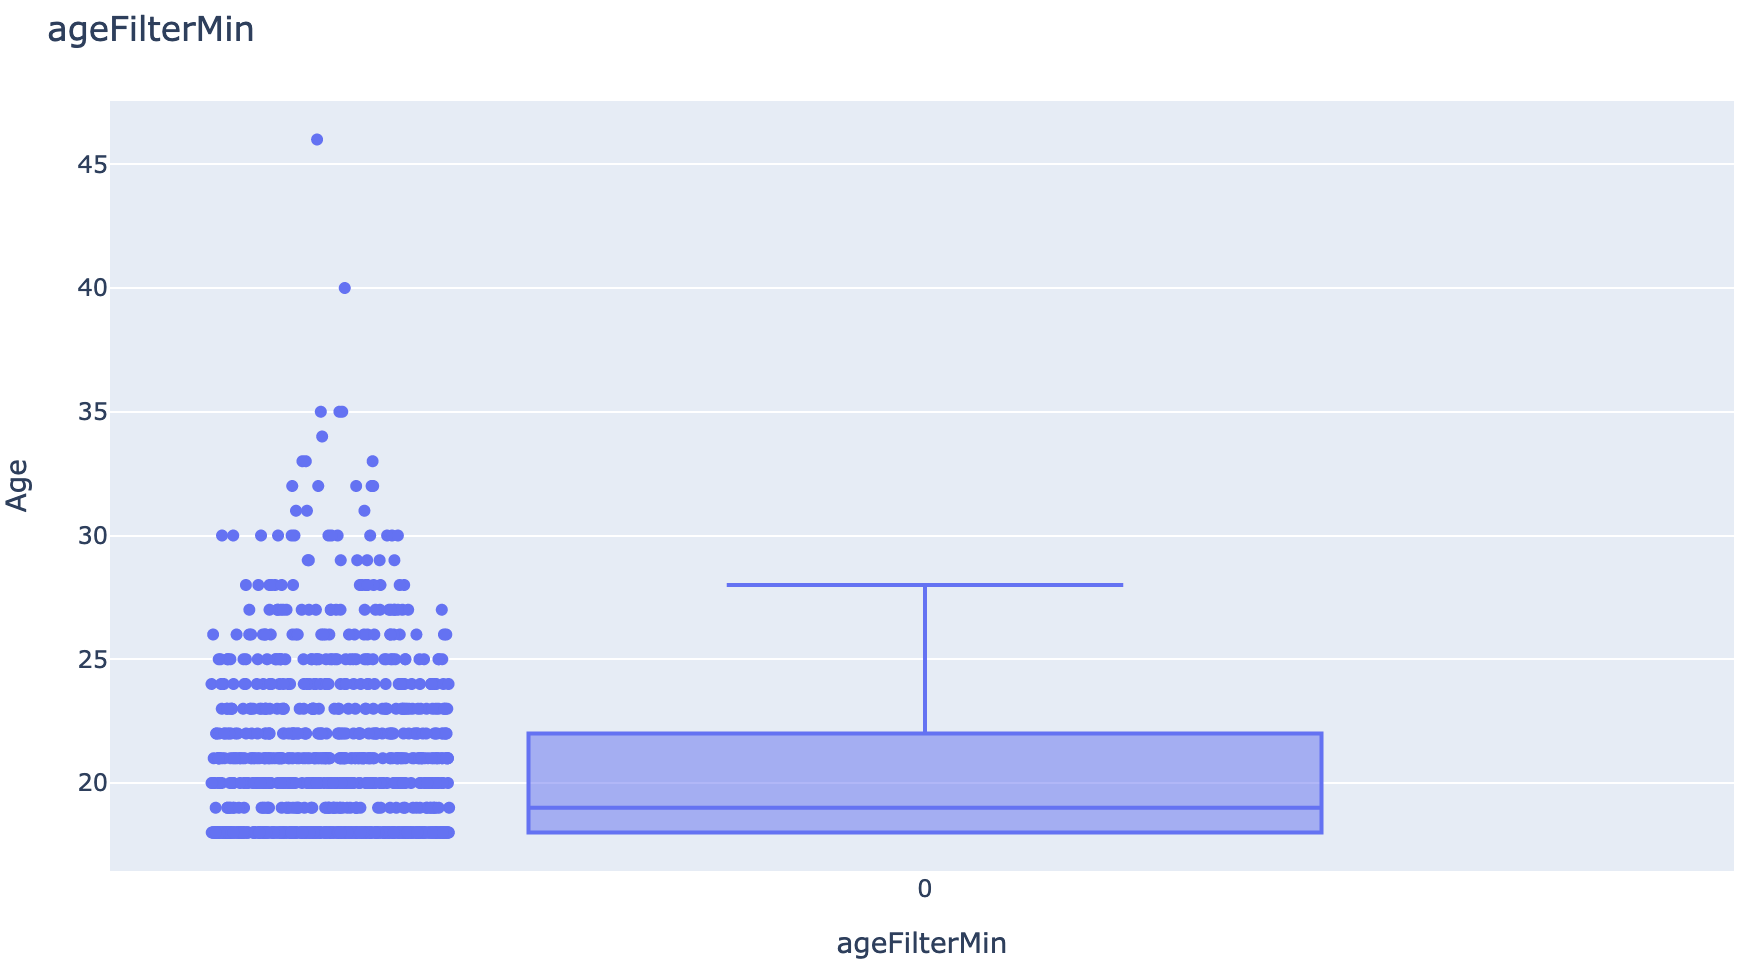

**ageFilterMax_boxplot.png**

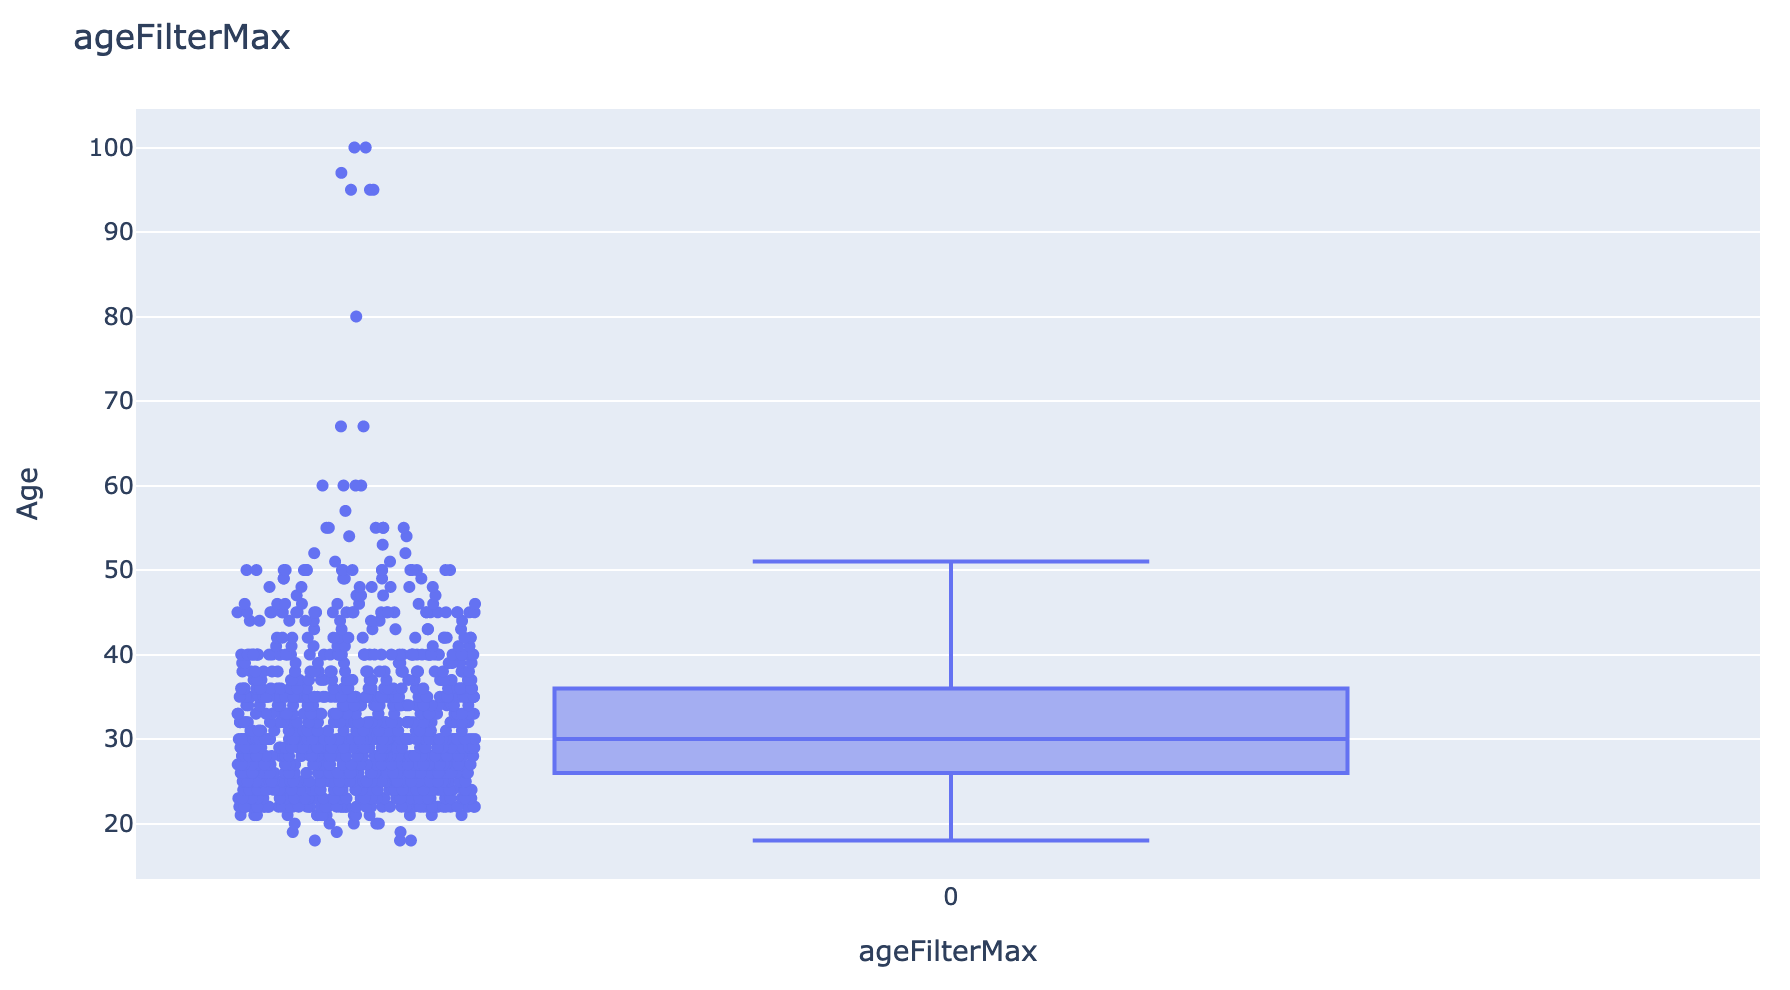

**age_outliers_boxplot.png**

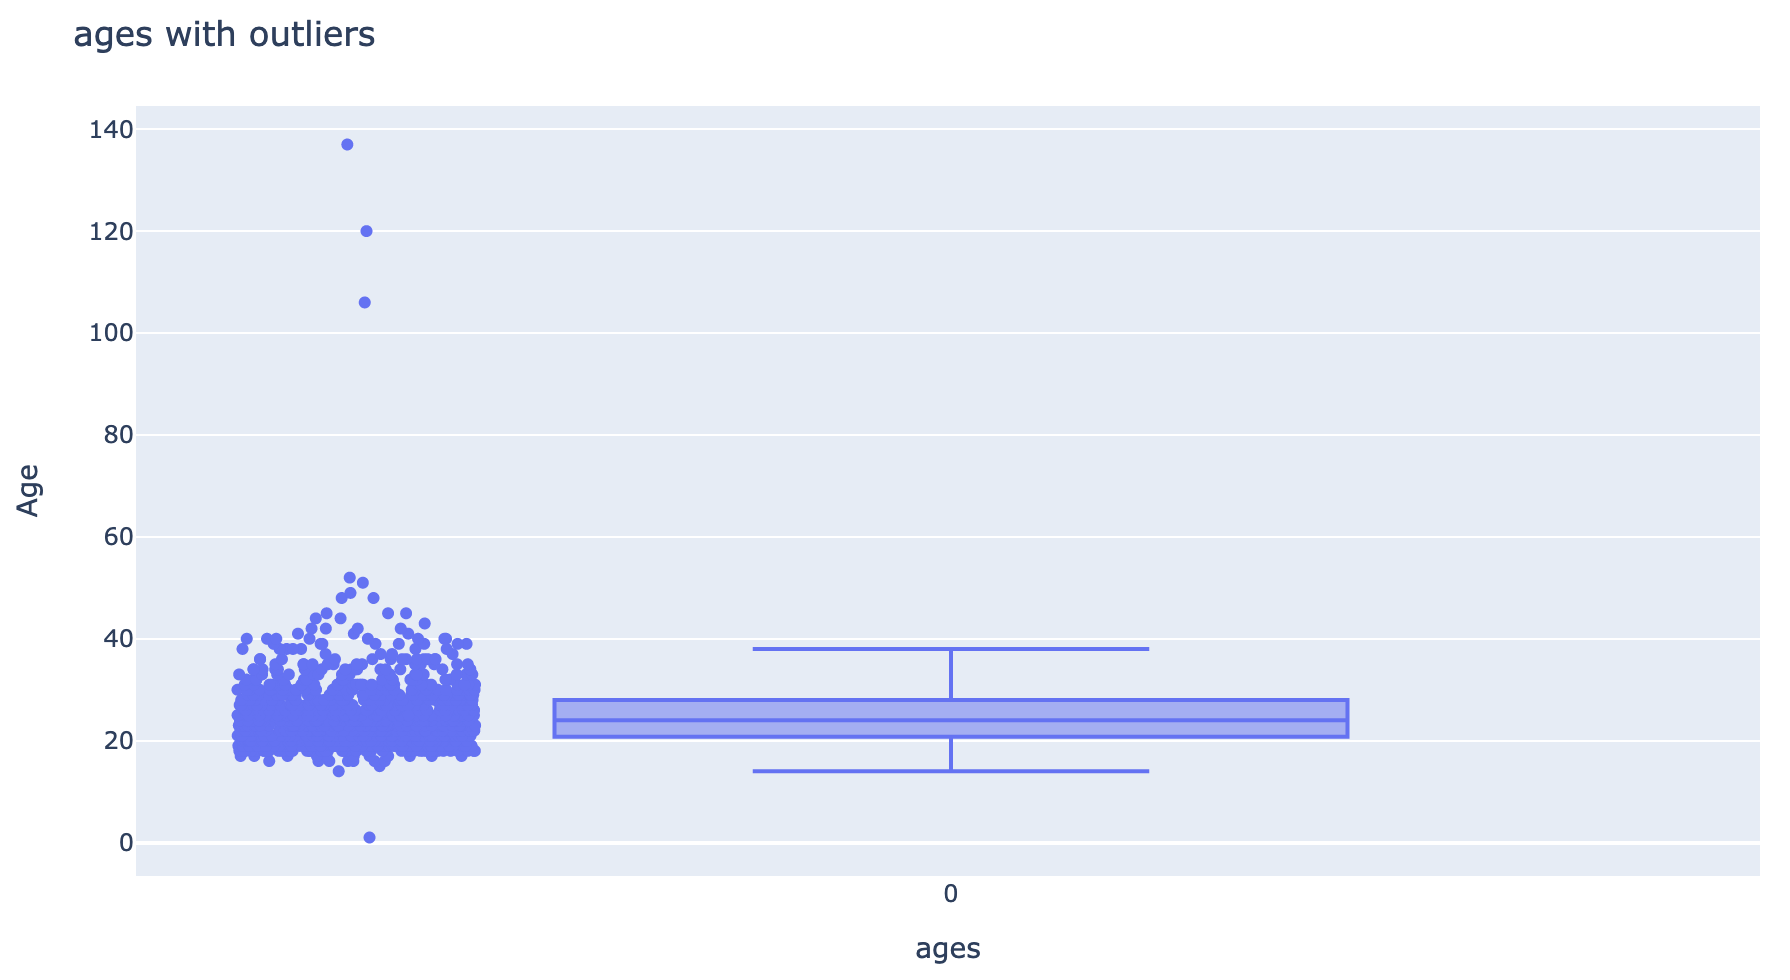

**age_boxplot.png**

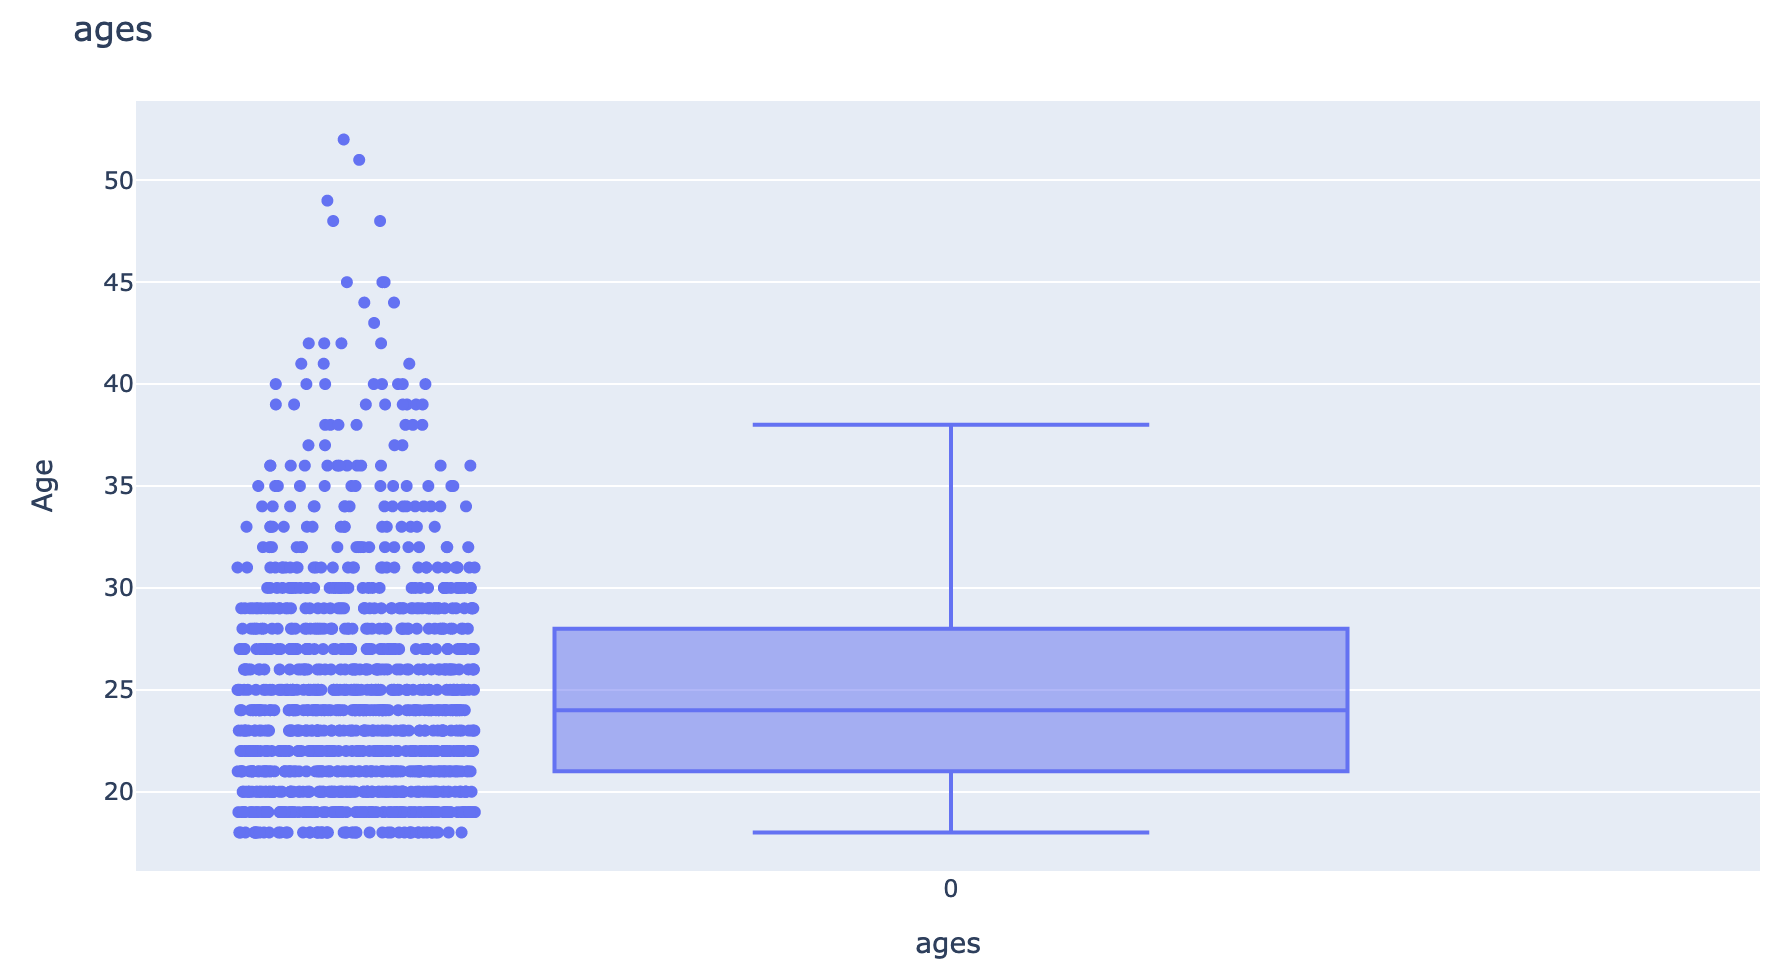

**likes_outliers_boxplot.png**

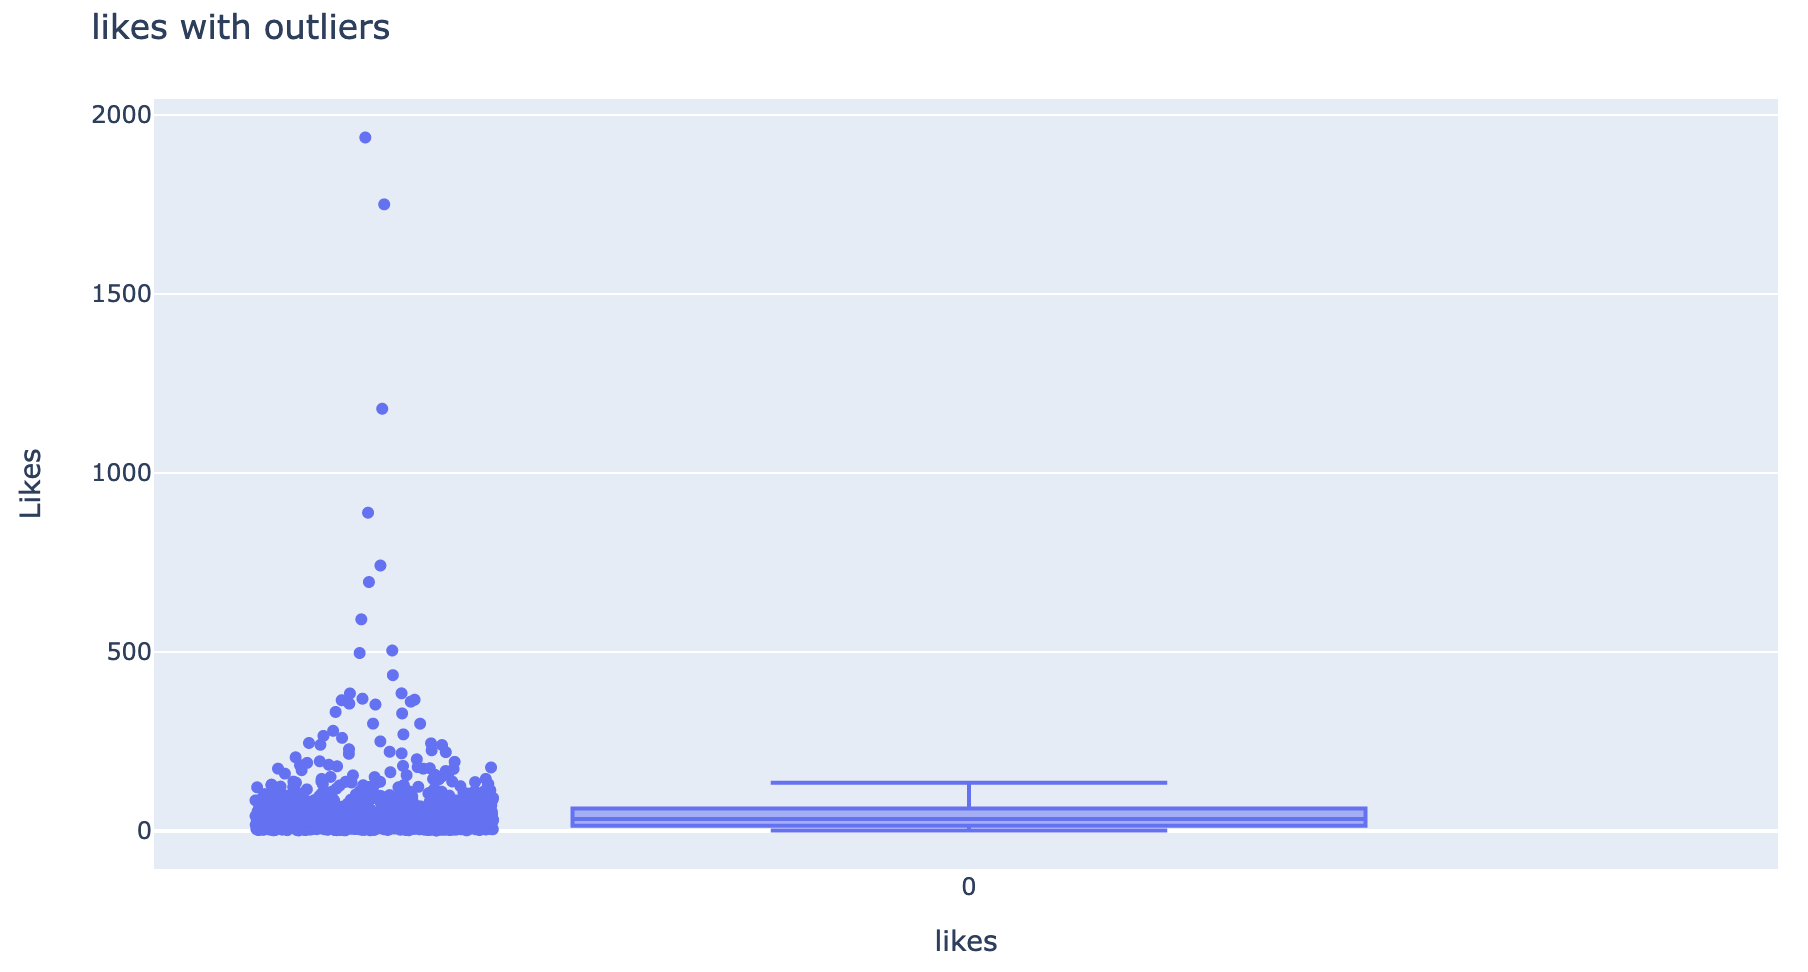

**likes_boxplot.png**

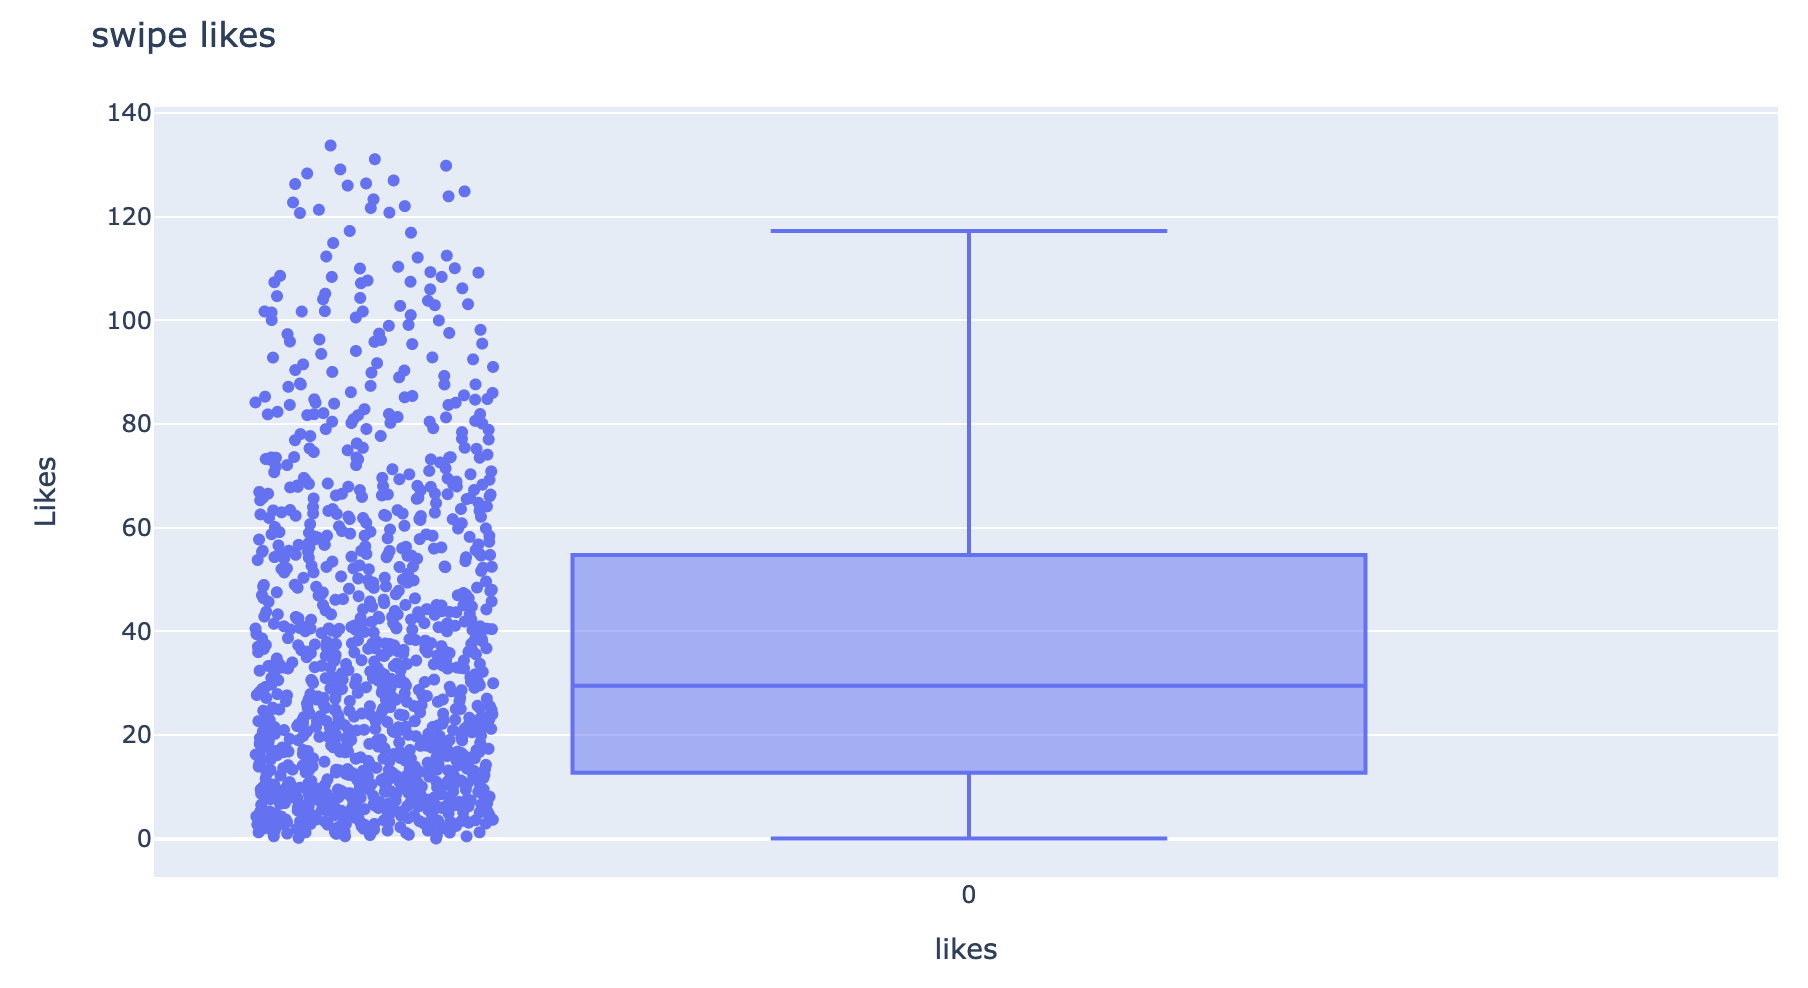

**passes_boxplot.png**

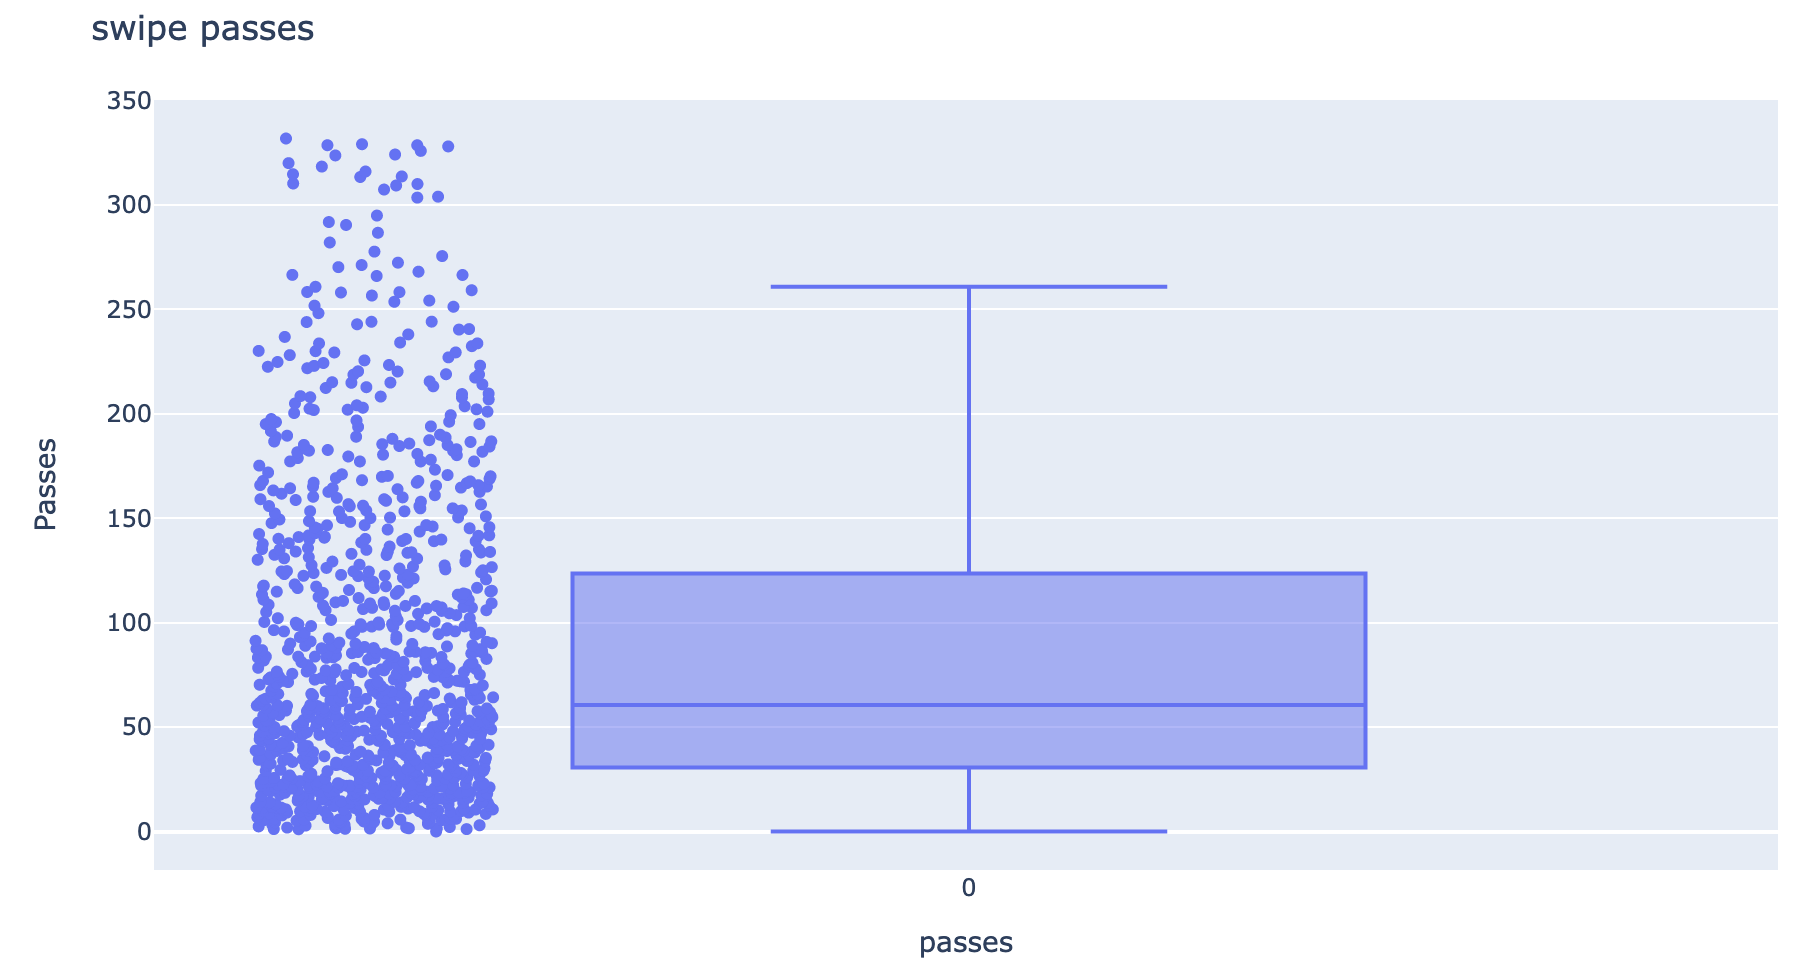

**matches_boxplot.png**

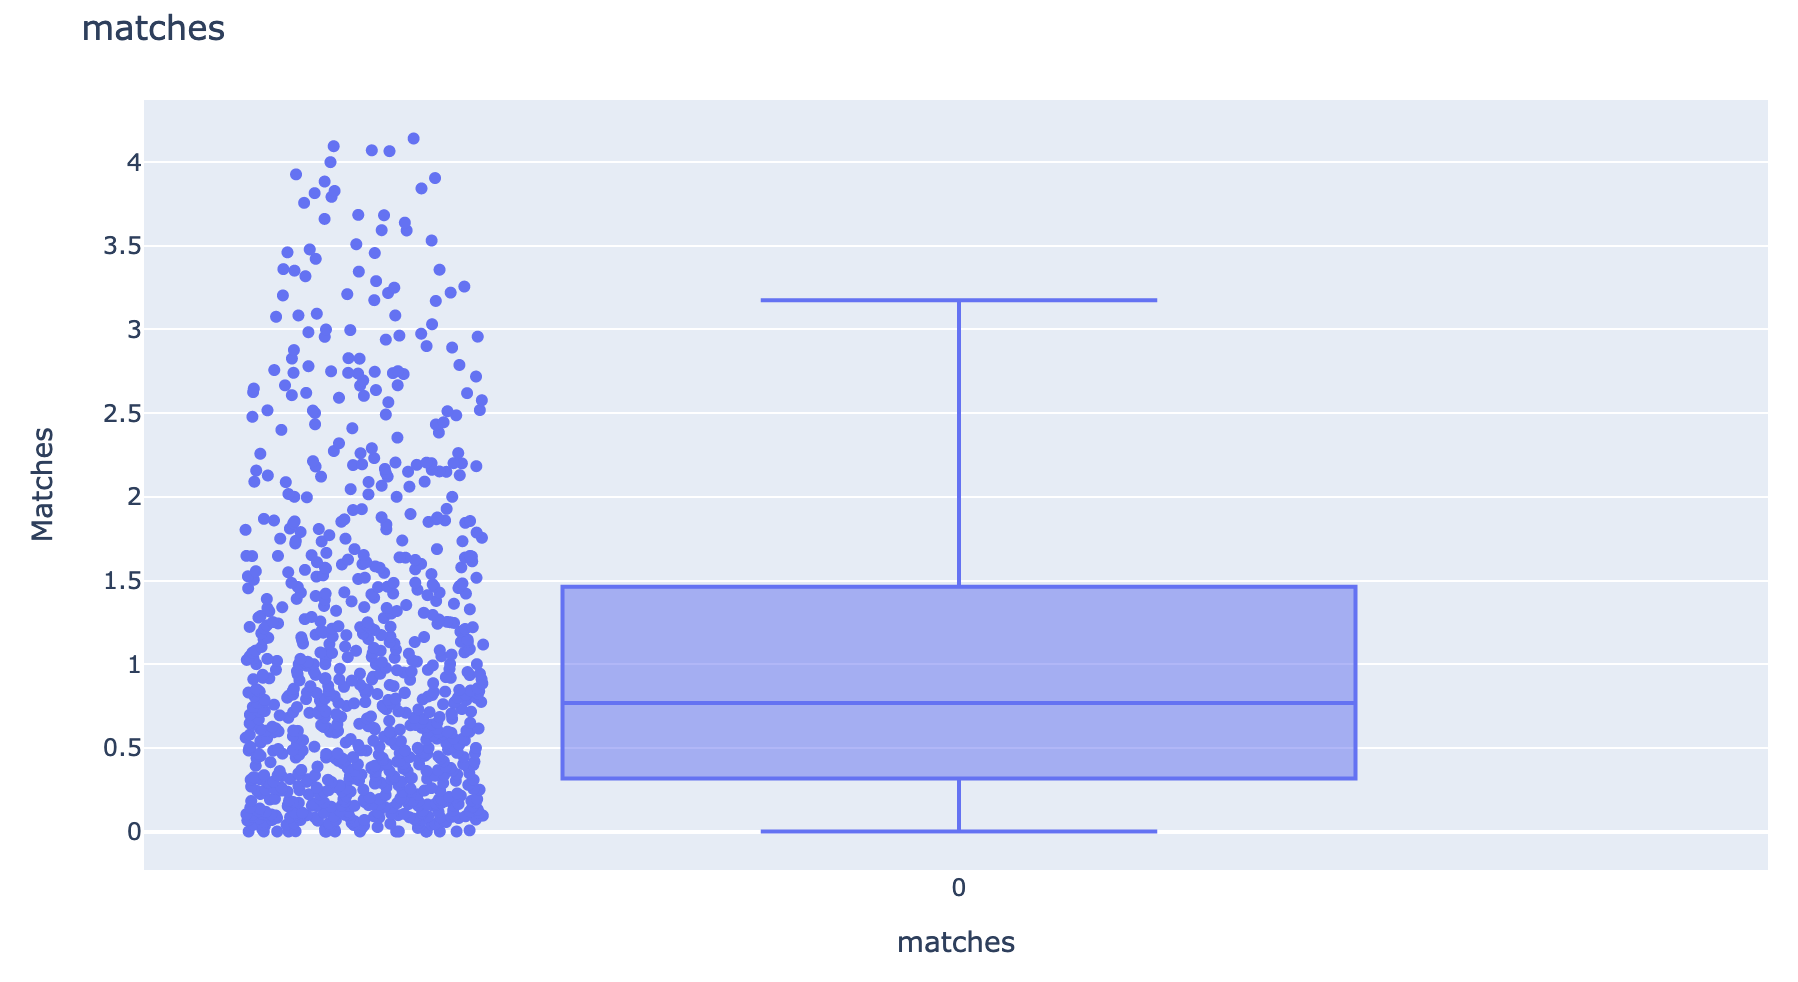

**nrOfConversations_boxplot.png**

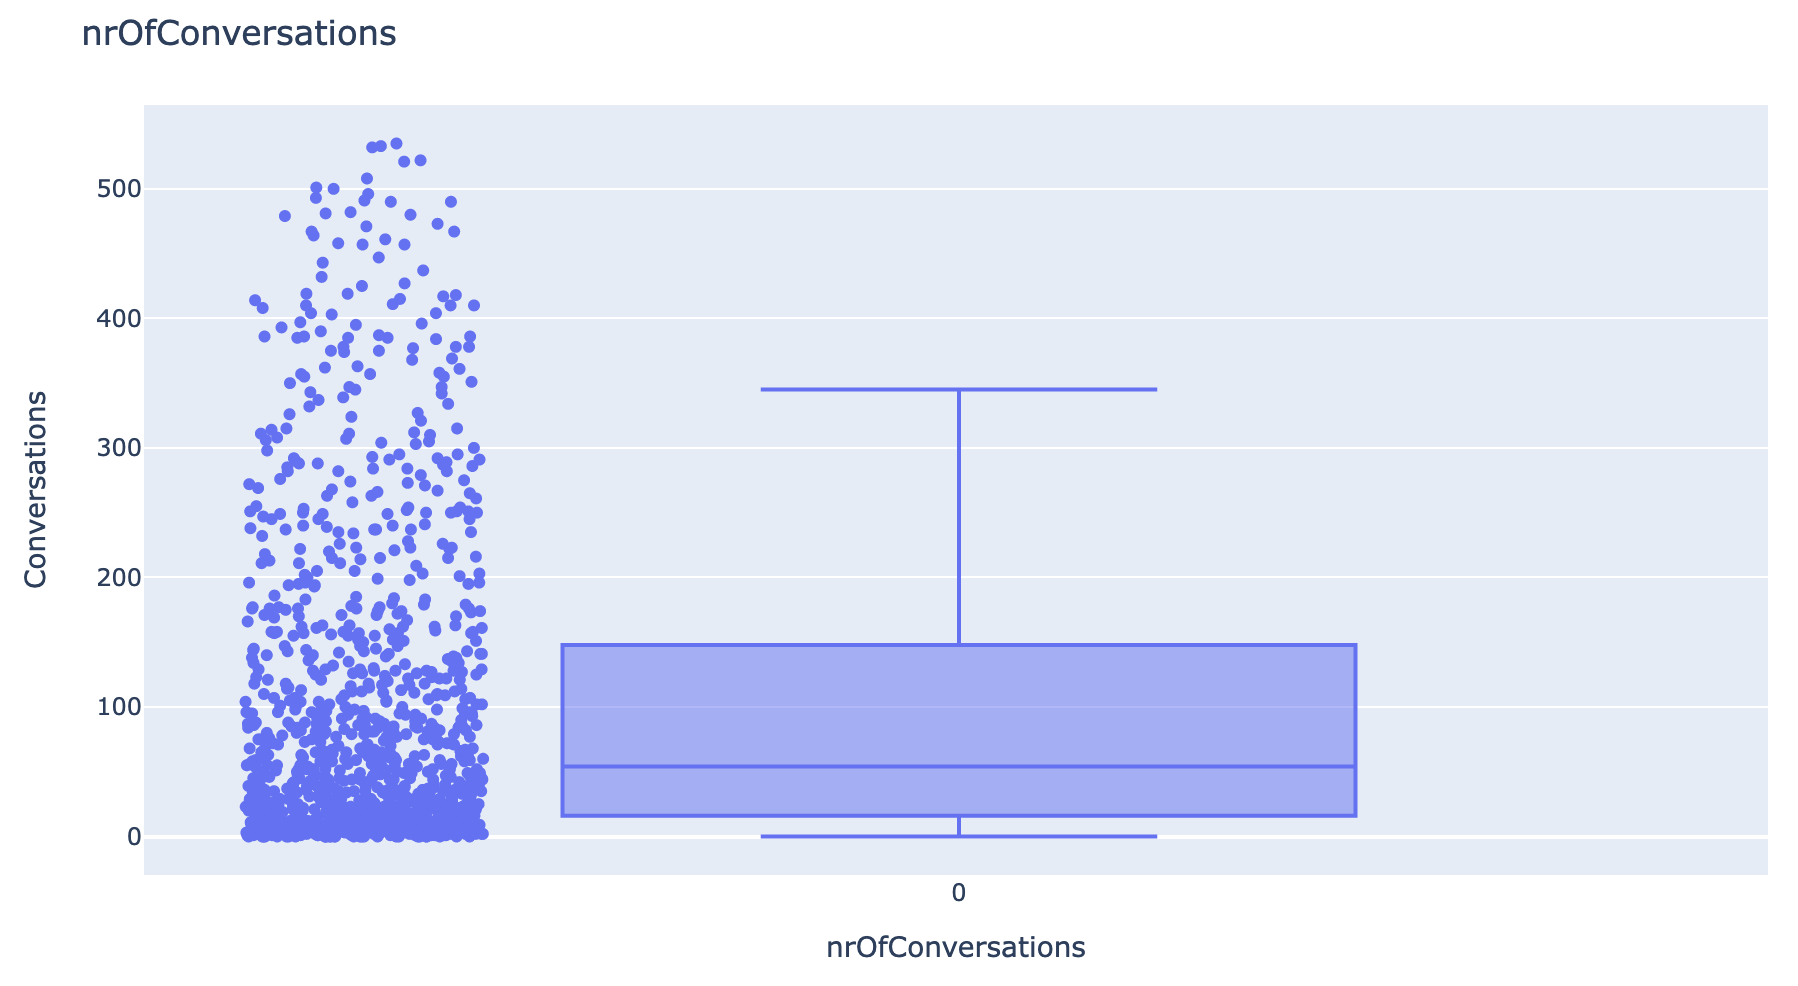

**averageConversationLength_boxplot.png**

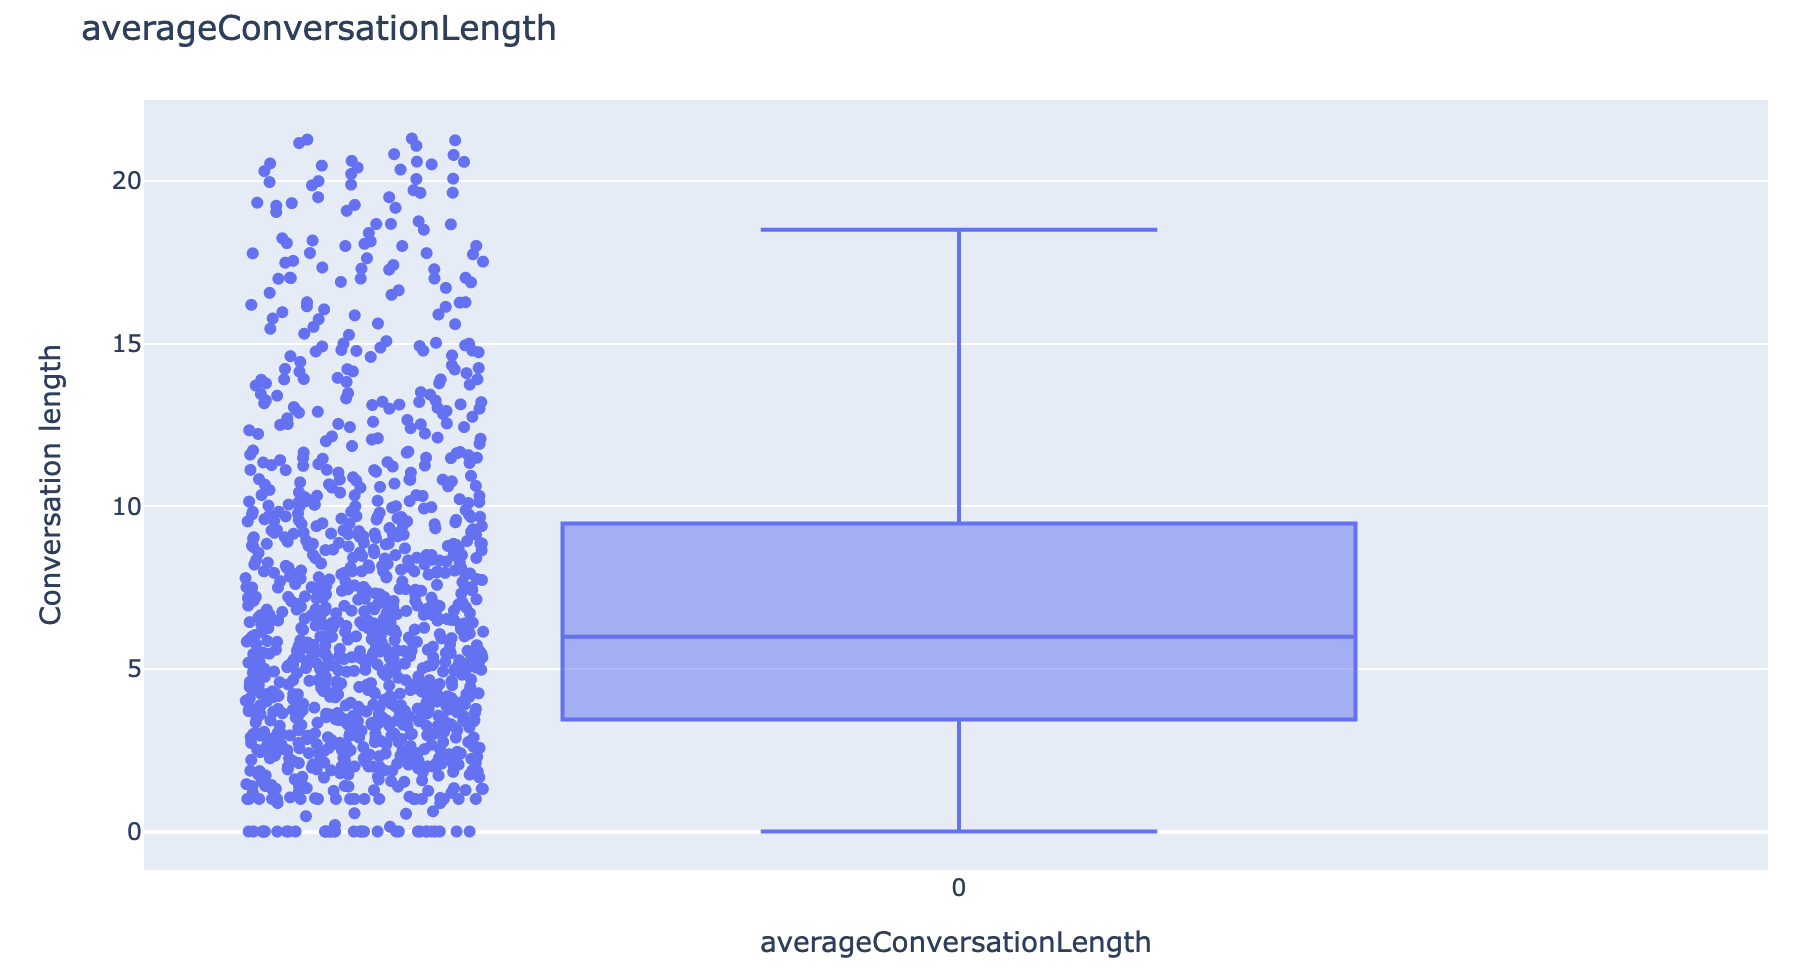

**emojis_men_bar.png**

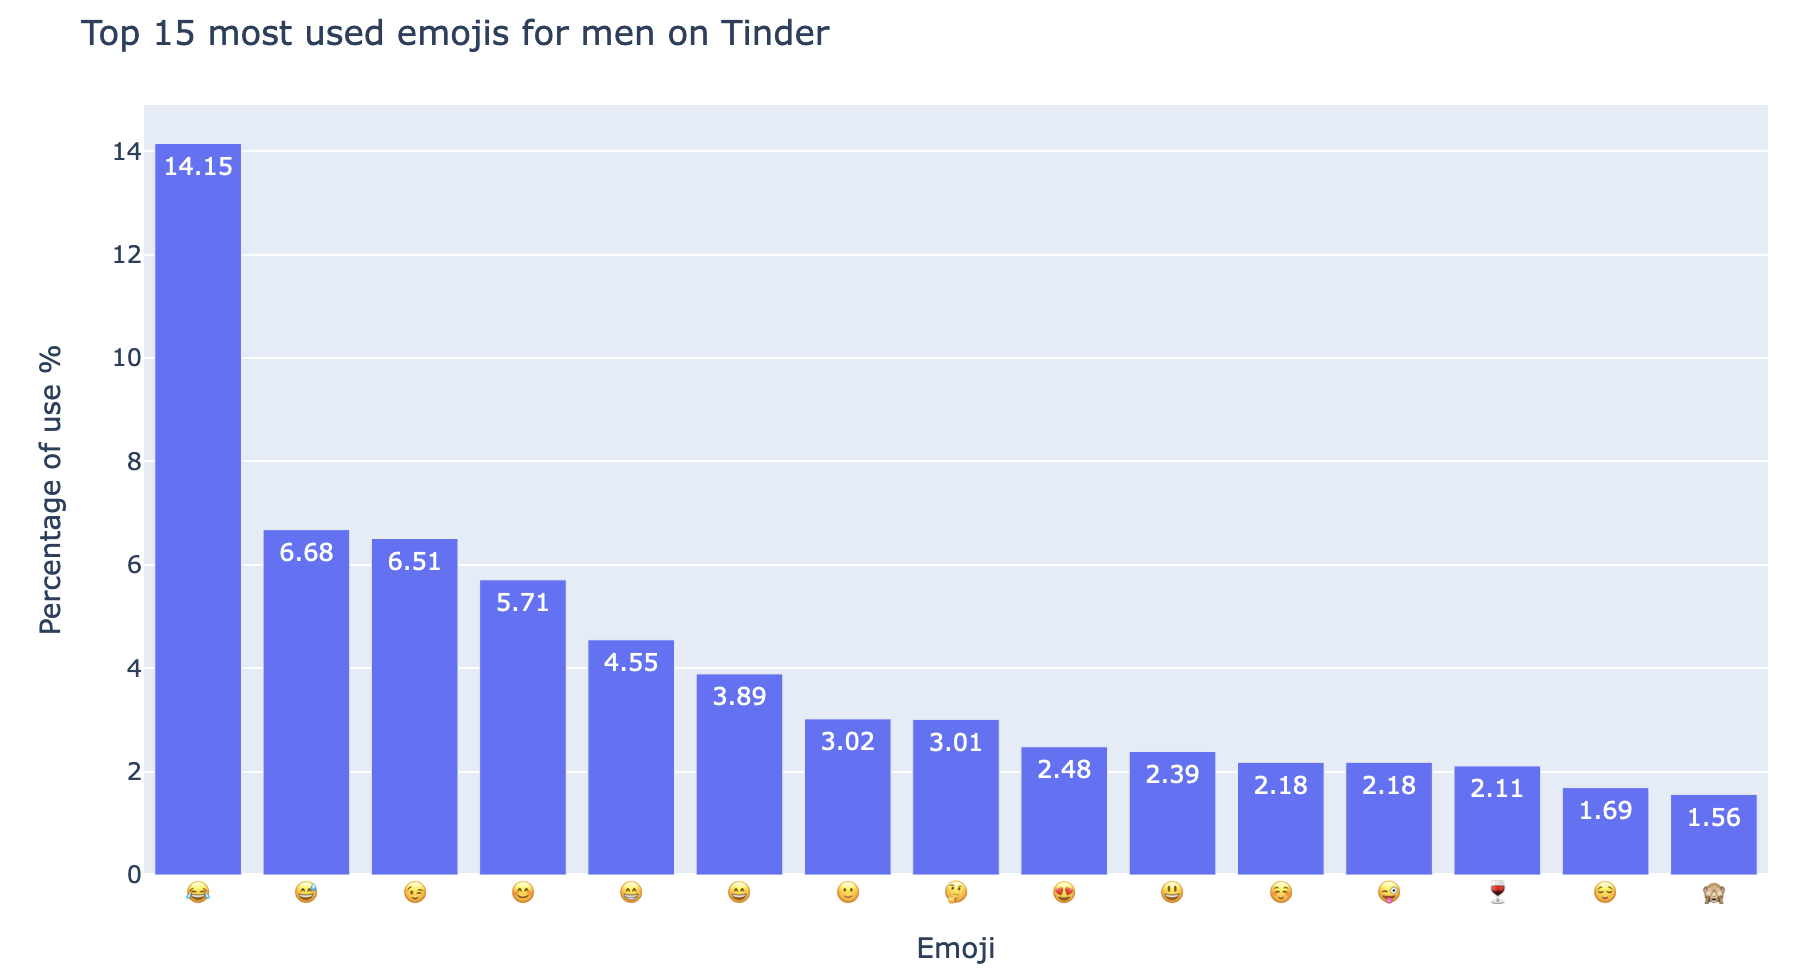

**emojis_women_bar.png**

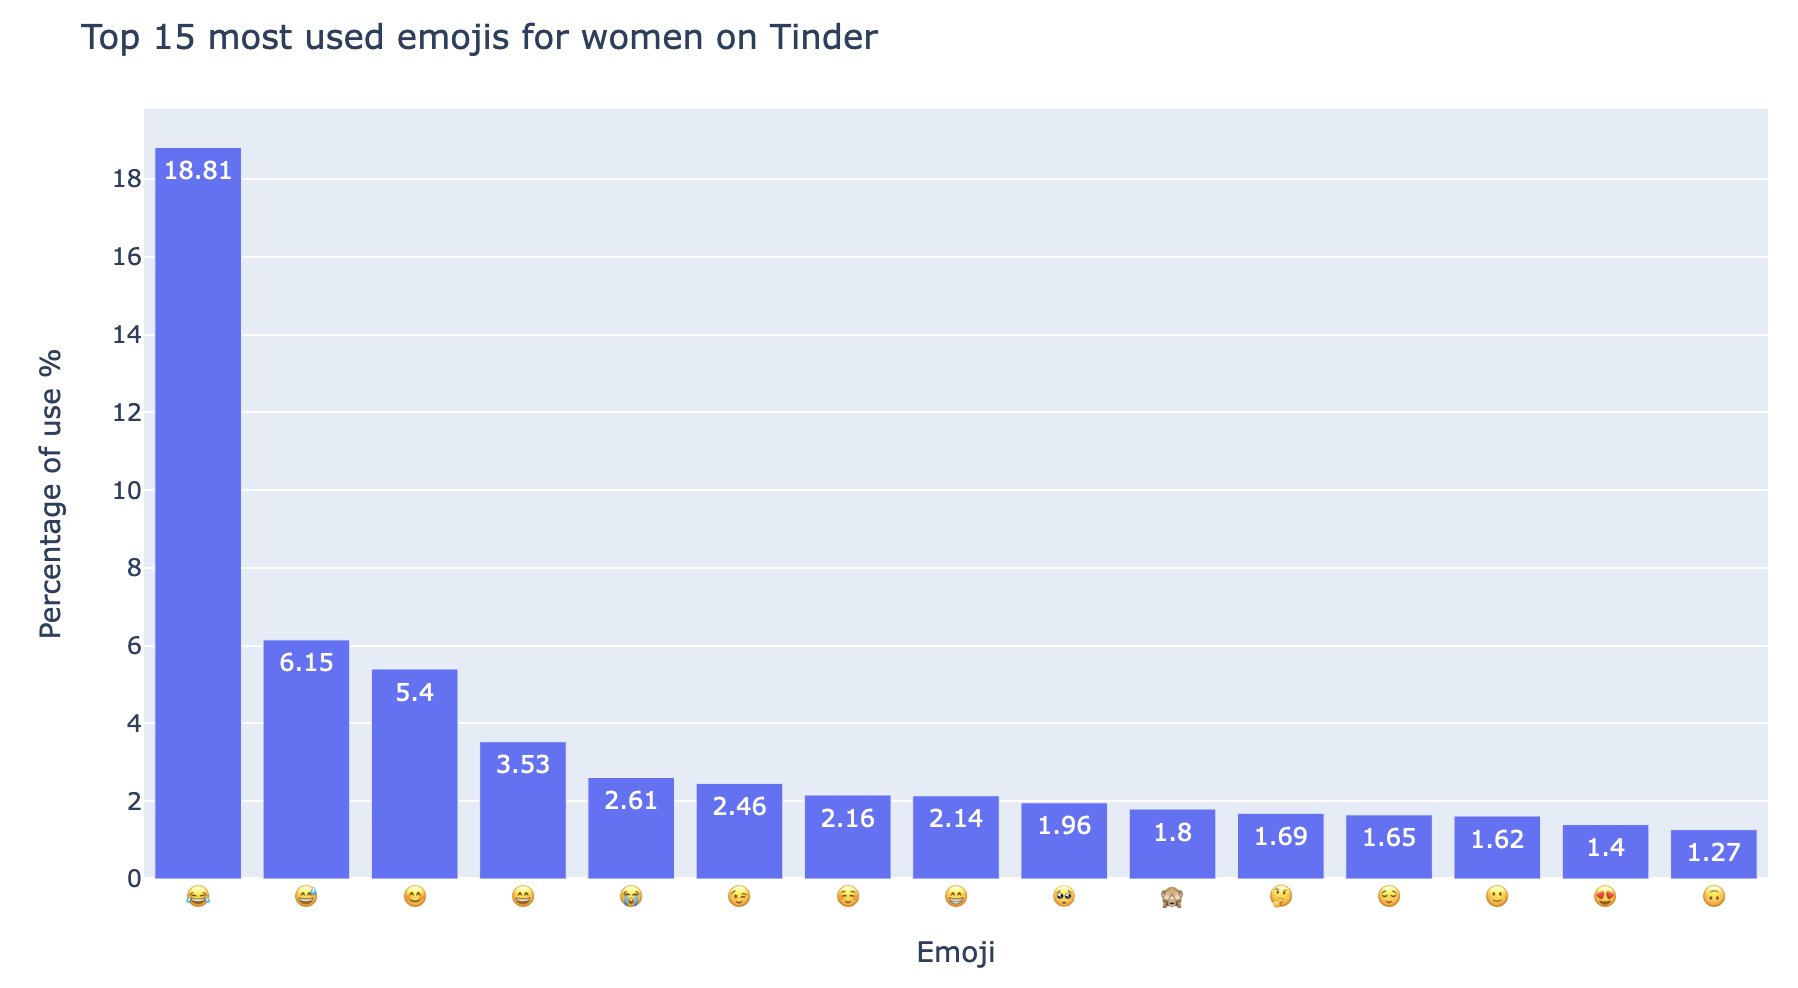